In [ ]:
from google.colab import files
uploaded = files.upload()

Saving project 3.zip to project 3.zip


In [ ]:
import shutil
shutil.unpack_archive("project 3.zip", "project 3")

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import os

os.getcwd()

'/content'

PRELIMINARY ANALYSIS
a):-

In [ ]:
items=pd.read_csv('/content/project 3/project 3/items.csv')

In [ ]:
items.head()

id  store_id                               name  kcal   cost
0   1         4                     Chocolate Cake   554   6.71
1   2         4  Breaded Fish with Vegetables Meal   772  15.09
2   3         1                  Sweet Fruity Cake   931  29.22
3   4         1    Amazing Steak Dinner with Rolls   763  26.42
4   5         5                          Milk Cake   583   6.07

In [ ]:
resturants=pd.read_csv('/content/project 3/project 3/resturants.csv')
sales=pd.read_csv('/content/project 3/project 3/sales.csv')


b):-

In [ ]:
sales.shape


(109600, 4)

In [ ]:
sales.dtypes

date           object
item_id         int64
price         float64
item_count    float64
dtype: object

In [ ]:
sales['date']=pd.to_datetime(sales['date'])
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109600 entries, 0 to 109599
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        109600 non-null  datetime64[ns]
 1   item_id     109600 non-null  int64         
 2   price       109600 non-null  float64       
 3   item_count  109600 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 3.3 MB


In [ ]:
sales.isnull().sum(axis=0)

date          0
item_id       0
price         0
item_count    0
dtype: int64

In [ ]:
items.shape

(100, 5)

In [ ]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        100 non-null    int64  
 1   store_id  100 non-null    int64  
 2   name      100 non-null    object 
 3   kcal      100 non-null    int64  
 4   cost      100 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.0+ KB


In [ ]:
items.isnull().sum()

id          0
store_id    0
name        0
kcal        0
cost        0
dtype: int64

In [ ]:
resturants.shape

(6, 2)

In [ ]:
resturants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6 non-null      int64 
 1   name    6 non-null      object
dtypes: int64(1), object(1)
memory usage: 228.0+ bytes


c):-

In [ ]:
merged_data=pd.merge(sales,items,left_on='item_id',right_on='id',how='left')
merged_data.head()

date  item_id  price  item_count  id  store_id  \
0 2019-01-01        3  29.22         2.0   3         1   
1 2019-01-01        4  26.42        22.0   4         1   
2 2019-01-01       12   4.87         7.0  12         1   
3 2019-01-01       13   4.18        12.0  13         1   
4 2019-01-01       16   3.21       136.0  16         1   

                              name  kcal   cost  
0                Sweet Fruity Cake   931  29.22  
1  Amazing Steak Dinner with Rolls   763  26.42  
2             Fantastic Sweet Cola   478   4.87  
3          Sweet Frozen Soft Drink   490   4.18  
4             Frozen Milky Smoothy   284   3.21

In [ ]:
data=pd.merge(merged_data,resturants,left_on='store_id',right_on='id',how='left')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109600 entries, 0 to 109599
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        109600 non-null  datetime64[ns]
 1   item_id     109600 non-null  int64         
 2   price       109600 non-null  float64       
 3   item_count  109600 non-null  float64       
 4   id_x        109600 non-null  int64         
 5   store_id    109600 non-null  int64         
 6   name_x      109600 non-null  object        
 7   kcal        109600 non-null  int64         
 8   cost        109600 non-null  float64       
 9   id_y        109600 non-null  int64         
 10  name_y      109600 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(5), object(2)
memory usage: 9.2+ MB


In [ ]:
(data['item_id'] == data['id_x']).all()

True

In [ ]:
(data['store_id']==data['id_y']).all()

True

In [ ]:
data.drop(columns=['id_x','id_y'],inplace=True)


In [ ]:
data.head()

date  item_id  price  item_count  store_id  \
0 2019-01-01        3  29.22         2.0         1   
1 2019-01-01        4  26.42        22.0         1   
2 2019-01-01       12   4.87         7.0         1   
3 2019-01-01       13   4.18        12.0         1   
4 2019-01-01       16   3.21       136.0         1   

                            name_x  kcal   cost       name_y  
0                Sweet Fruity Cake   931  29.22  Bob's Diner  
1  Amazing Steak Dinner with Rolls   763  26.42  Bob's Diner  
2             Fantastic Sweet Cola   478   4.87  Bob's Diner  
3          Sweet Frozen Soft Drink   490   4.18  Bob's Diner  
4             Frozen Milky Smoothy   284   3.21  Bob's Diner

In [ ]:
data.rename(columns={"name_x":"item_name","name_y":"resturant_name"},inplace=True)

In [ ]:
data.head()

date  item_id  price  item_count  store_id  \
0 2019-01-01        3  29.22         2.0         1   
1 2019-01-01        4  26.42        22.0         1   
2 2019-01-01       12   4.87         7.0         1   
3 2019-01-01       13   4.18        12.0         1   
4 2019-01-01       16   3.21       136.0         1   

                         item_name  kcal   cost resturant_name  
0                Sweet Fruity Cake   931  29.22    Bob's Diner  
1  Amazing Steak Dinner with Rolls   763  26.42    Bob's Diner  
2             Fantastic Sweet Cola   478   4.87    Bob's Diner  
3          Sweet Frozen Soft Drink   490   4.18    Bob's Diner  
4             Frozen Milky Smoothy   284   3.21    Bob's Diner

EXPLORATORY DATA ANALYSIS
a):-

In [ ]:
overall_sales=data.groupby('date')['item_count'].sum()

In [ ]:
overall_sales

date
2019-01-01    427.0
2019-01-02    337.0
2019-01-03    445.0
2019-01-04    564.0
2019-01-05    552.0
              ...  
2021-12-27    192.0
2021-12-28    344.0
2021-12-29    371.0
2021-12-30    527.0
2021-12-31    817.0
Name: item_count, Length: 1096, dtype: float64

Text(0.5, 1.0, 'sales at day level')

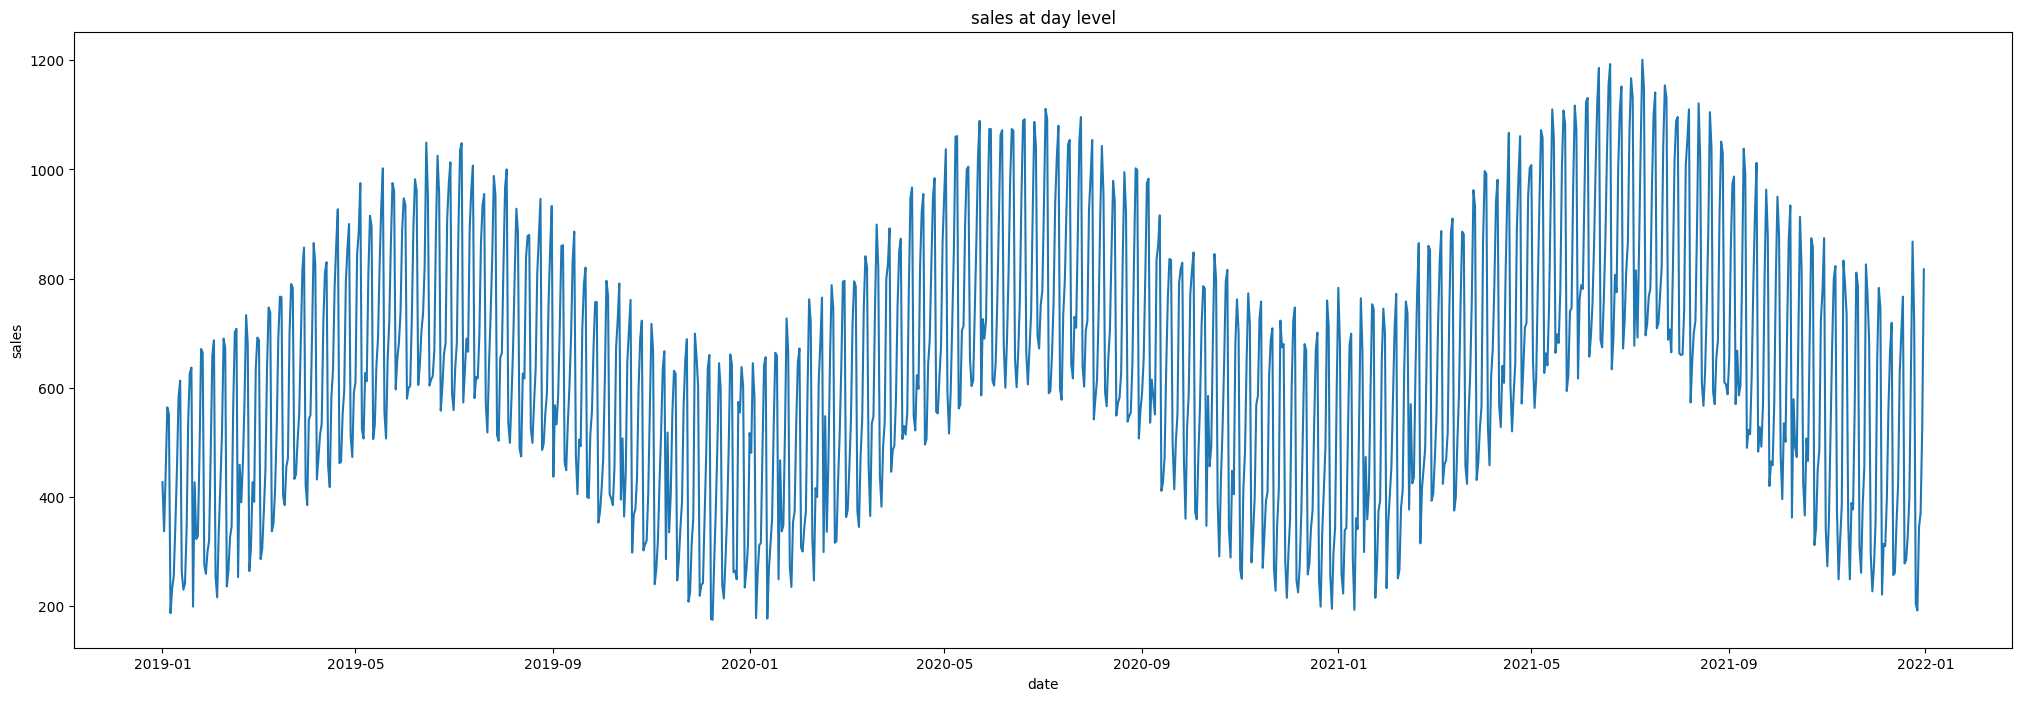

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,8))
plt.plot(overall_sales)
plt.xlabel('date')
plt.ylabel('sales')
plt.title('sales at day level')

In [ ]:
overall_sales.max()

1201.0

In [ ]:
overall_sales[overall_sales==overall_sales.max()]

date
2021-07-09    1201.0
Name: item_count, dtype: float64

b):-

In [ ]:
data['weekday']=data['date'].dt.day_name()


In [ ]:
sales_day=data.groupby('weekday')['item_count'].sum()

In [ ]:
sales_day

weekday
Friday       136300.0
Monday        70112.0
Saturday     135644.0
Sunday        68032.0
Thursday     116947.0
Tuesday       79454.0
Wednesday     88298.0
Name: item_count, dtype: float64

In [ ]:
sales_day_df=pd.DataFrame(sales_day).reset_index()
sales_day_df

weekday  item_count
0     Friday    136300.0
1     Monday     70112.0
2   Saturday    135644.0
3     Sunday     68032.0
4   Thursday    116947.0
5    Tuesday     79454.0
6  Wednesday     88298.0

<BarContainer object of 7 artists>

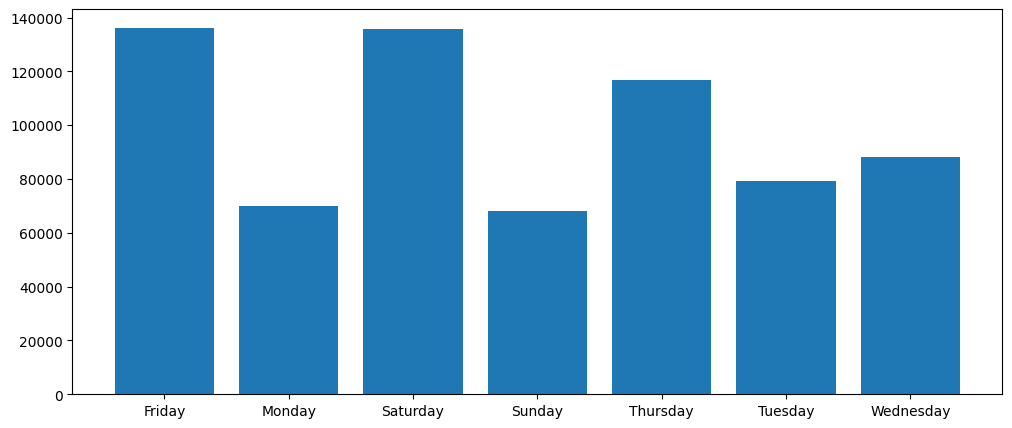

In [ ]:
plt.figure(figsize=(12,5))
plt.bar(x=sales_day_df['weekday'],height=sales_day_df['item_count'])


c):-

In [ ]:
data['month_name']=data['date'].dt.month_name()
import calendar
months=list(calendar.month_name[1:])
grouped=data.groupby('month_name')['item_count'].sum()
grouped=grouped.loc[months].squeeze()
grouped

month_name
January      41270.0
February     43596.0
March        55137.0
April        63145.0
May          73632.0
June         74423.0
July         77125.0
August       69502.0
September    58660.0
October      53403.0
November     43670.0
December     41224.0
Name: item_count, dtype: float64

<BarContainer object of 12 artists>

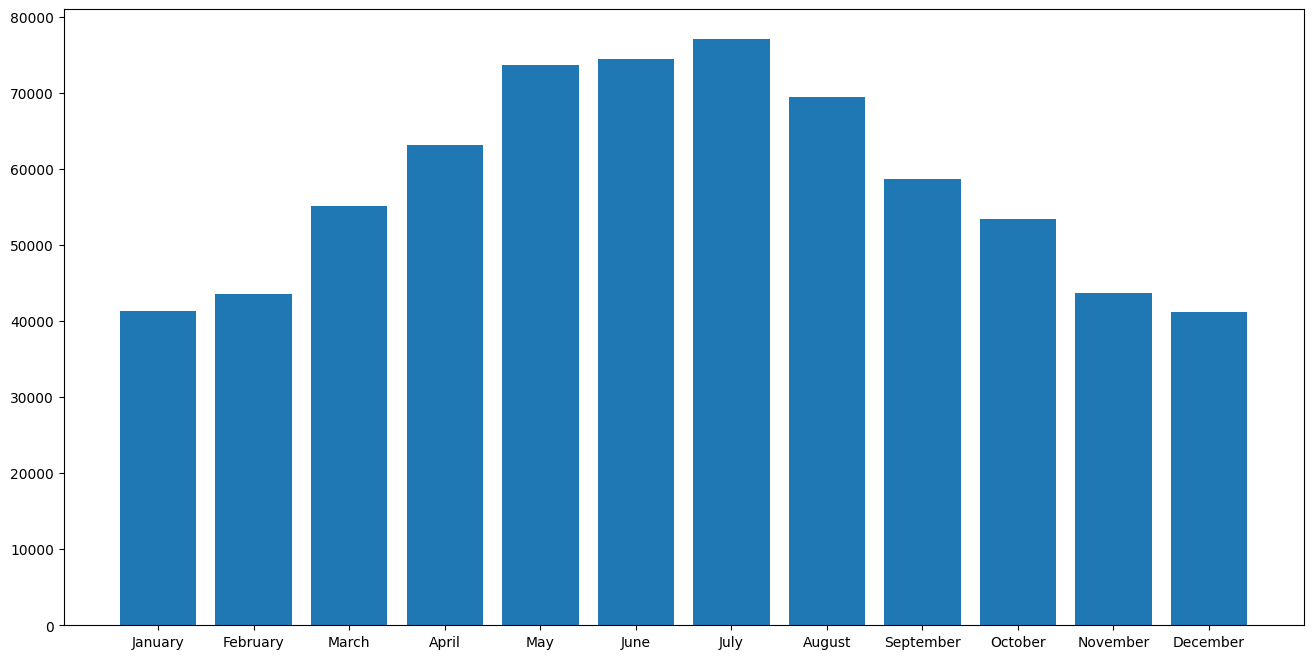

In [ ]:
plt.figure(figsize=(16,8))
plt.bar(height=grouped.values,x=grouped.index)

d):-

In [ ]:
data['quarter']=data['date'].dt.quarter
grpd=data.groupby('quarter')['item_count'].sum()
grpd

quarter
1    140003.0
2    211200.0
3    205287.0
4    138297.0
Name: item_count, dtype: float64

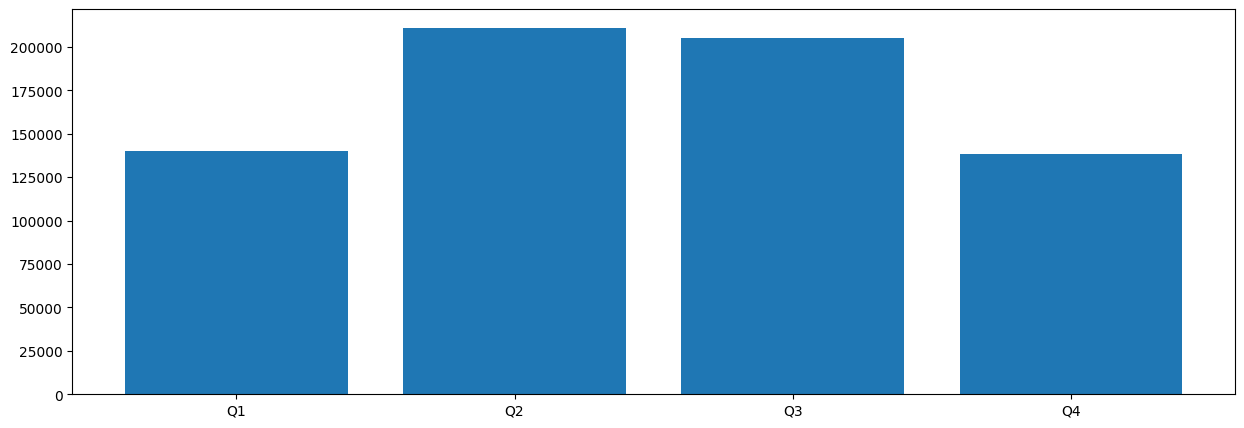

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(height=grpd.values,x=grpd.index)
plt.xticks(range(1,5),['Q'+str(i) for i in range(1,5)]);


e):-

In [ ]:
data.groupby('store_id')['item_count'].sum()

store_id
1    687527.0
2      1305.0
3      1736.0
4      1106.0
5      1310.0
6      1803.0
Name: item_count, dtype: float64

In [ ]:
data.columns

Index(['date', 'item_id', 'price', 'item_count', 'store_id', 'item_name',
       'kcal', 'cost', 'resturant_name', 'weekday', 'month_name', 'quarter'],
      dtype='object')

In [ ]:
data.pivot_table(index='store_id',columns='quarter',values='item_count',aggfunc=np.sum)

<ipython-input-22-ce2df00420d6>:1: FutureWarning: The provided callable <function sum at 0x7bd11a565a80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data.pivot_table(index='store_id',columns='quarter',values='item_count',aggfunc=np.sum)


quarter          1         2         3         4
store_id                                        
1         138188.0  209389.0  203510.0  136440.0
2            333.0     320.0     308.0     344.0
3            446.0     436.0     427.0     427.0
4            277.0     286.0     240.0     303.0
5            302.0     329.0     336.0     343.0
6            457.0     440.0     466.0     440.0

In [ ]:
items.head()

id  store_id                               name  kcal   cost
0   1         4                     Chocolate Cake   554   6.71
1   2         4  Breaded Fish with Vegetables Meal   772  15.09
2   3         1                  Sweet Fruity Cake   931  29.22
3   4         1    Amazing Steak Dinner with Rolls   763  26.42
4   5         5                          Milk Cake   583   6.07

In [ ]:
items_served=items.groupby(['store_id']).agg({'id':'nunique'})

In [ ]:
items_served

id
store_id    
1         24
2          6
3          8
4         28
5         24
6         10

In [ ]:
items_served=items_served.squeeze()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
pal=sns.color_palette()


In [ ]:
items_served[1]

24

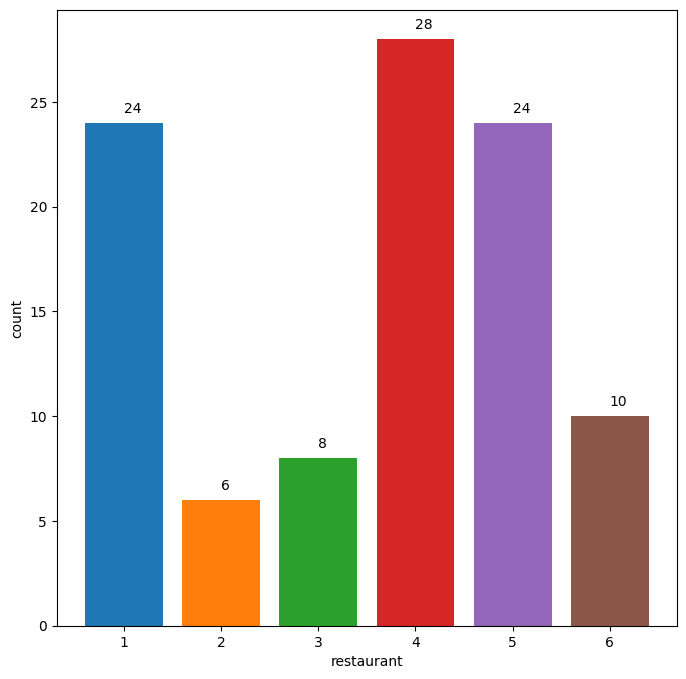

In [ ]:
plt.figure(figsize=(8,8))
plt.bar(items_served.index,items_served.values,color=pal)
plt.xlabel('restaurant')
plt.ylabel('count')
for i in range(1,7):
    plt.annotate(items_served[i],xy=(i,items_served[i]+0.5))

In [ ]:
data.columns

Index(['date', 'item_id', 'price', 'item_count', 'store_id', 'item_name',
       'kcal', 'cost', 'resturant_name', 'weekday', 'month_name', 'quarter'],
      dtype='object')

In [ ]:
plot_data=data.pivot_table(index='date',columns='store_id',values='item_count',aggfunc=np.sum)

<ipython-input-28-fe321fc67192>:1: FutureWarning: The provided callable <function sum at 0x7bd11a565a80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  plot_data=data.pivot_table(index='date',columns='store_id',values='item_count',aggfunc=np.sum)


In [ ]:
plot_data.head()

store_id        1    2    3    4    5    6
date                                      
2019-01-01  421.0  1.0  0.0  1.0  2.0  2.0
2019-01-02  330.0  1.0  1.0  2.0  1.0  2.0
2019-01-03  438.0  1.0  2.0  3.0  0.0  1.0
2019-01-04  559.0  2.0  2.0  1.0  0.0  0.0
2019-01-05  545.0  1.0  2.0  2.0  2.0  0.0

In [ ]:
plot_data.loc[:,1]

date
2019-01-01    421.0
2019-01-02    330.0
2019-01-03    438.0
2019-01-04    559.0
2019-01-05    545.0
              ...  
2021-12-27    184.0
2021-12-28    340.0
2021-12-29    366.0
2021-12-30    525.0
2021-12-31    815.0
Name: 1, Length: 1096, dtype: float64

(<Figure size 640x480 with 6 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

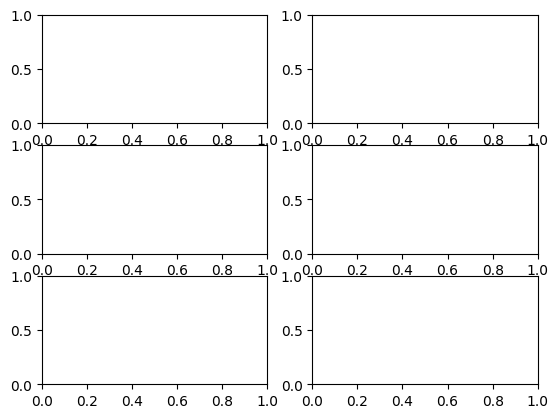

In [ ]:
plt.subplots(3,2)

In [ ]:
resturants

id            name
0   1     Bob's Diner
1   2  Beachfront Bar
2   3     Sweet Shack
3   4        Fou Cher
4   5     Corner Cafe
5   6        Surfs Up

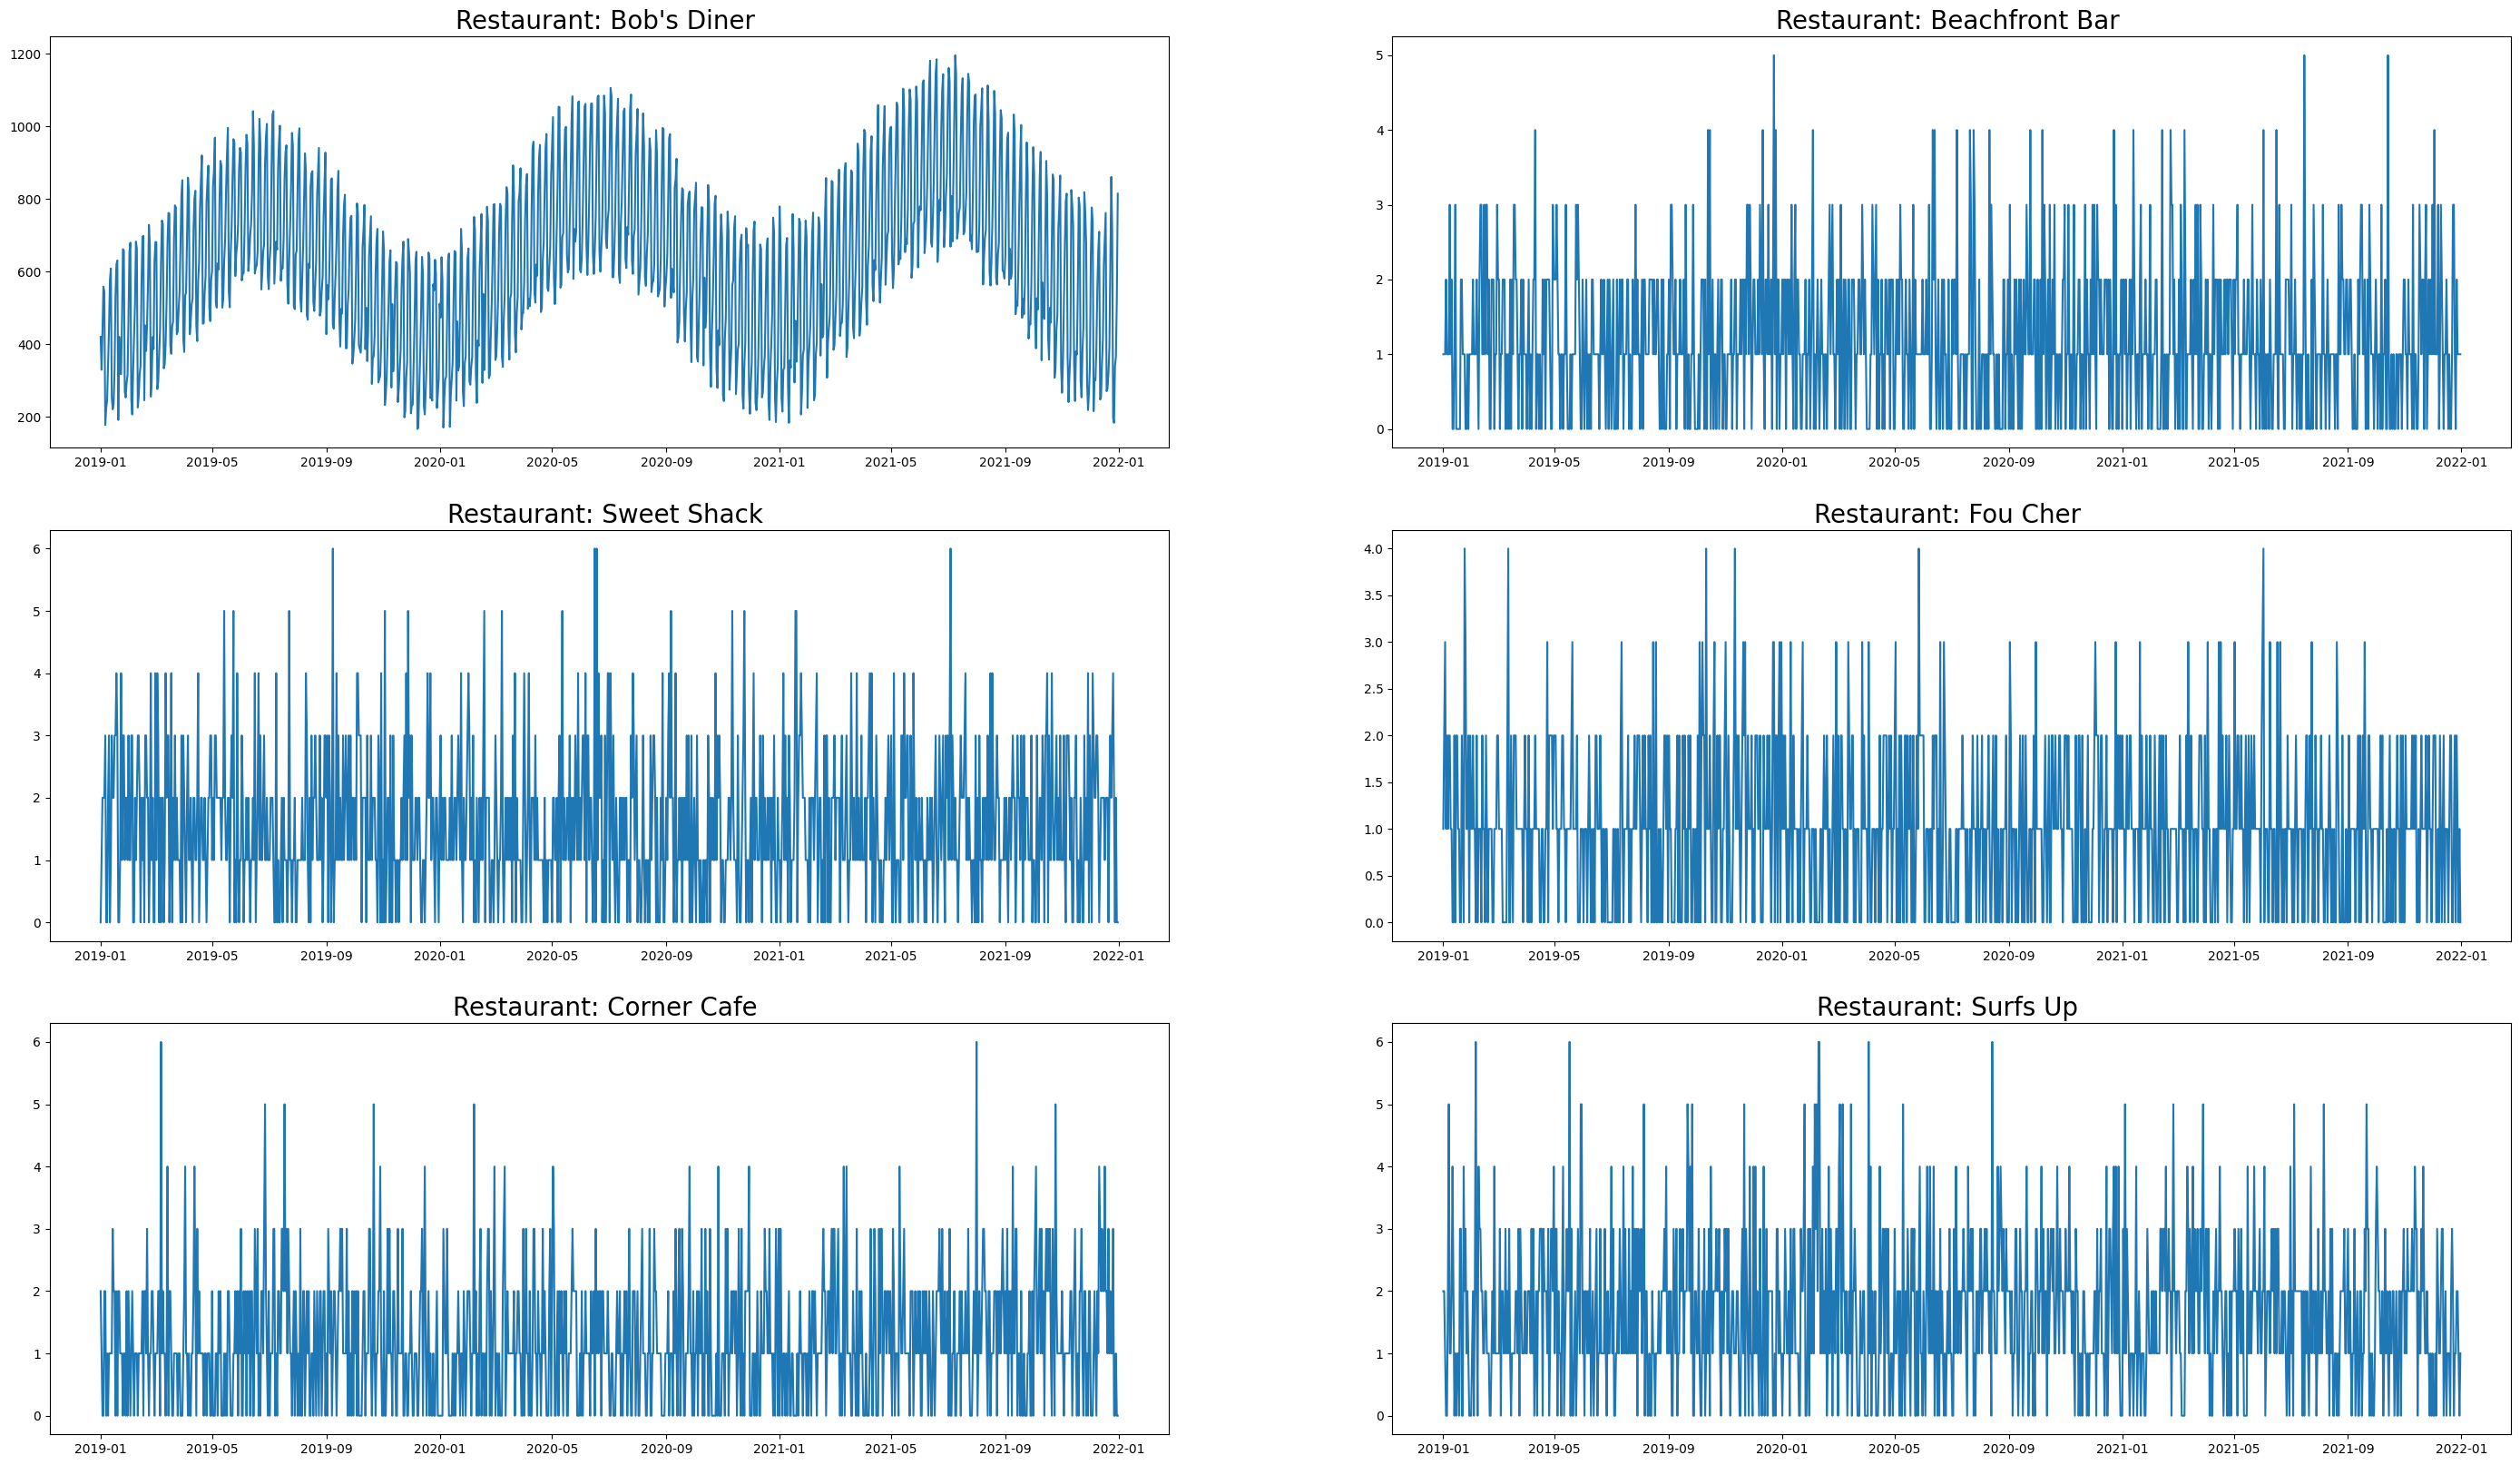

In [ ]:
plot_data = data.pivot_table(index = 'date', columns = 'store_id',values = 'item_count', aggfunc = 'sum')
f,ax = plt.subplots(3,2,figsize =(35,20) )
r,c = 0,0
for i in range(1,7):
  ax[r,c].plot(plot_data.loc[:, i])
  ax[r,c].set_title('Restaurant: {} '.format(resturants.loc[resturants.id == i, 'name'].values[0]), size = 20)
  c += 1
  if c == 2:
    c = 0
    r +=1


In [ ]:
ax[0,0].set_title('top left')


Text(0.5, 1.0, 'top left')

In [ ]:
#year wise sales
data['quart-year']='Q'+data['quarter'].astype('str')+'-'+data['date'].dt.year.astype('str')

In [ ]:
data['date'].dt.year
data.head(2)

date  item_id  price  item_count  store_id  \
0 2019-01-01        3  29.22         2.0         1   
1 2019-01-01        4  26.42        22.0         1   

                         item_name  kcal   cost resturant_name  weekday  \
0                Sweet Fruity Cake   931  29.22    Bob's Diner  Tuesday   
1  Amazing Steak Dinner with Rolls   763  26.42    Bob's Diner  Tuesday   

  month_name  quarter quart-year  
0    January        1    Q1-2019  
1    January        1    Q1-2019

In [ ]:
plot_data=data.pivot_table(index='quart-year',columns='store_id',values='item_count',aggfunc=np.sum)

<ipython-input-33-7df4117df46f>:1: FutureWarning: The provided callable <function sum at 0x7bd11a565a80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  plot_data=data.pivot_table(index='quart-year',columns='store_id',values='item_count',aggfunc=np.sum)


In [ ]:

plot_data

store_id          1      2      3      4      5      6
quart-year                                            
Q1-2019     42631.0  111.0  155.0   99.0   99.0  136.0
Q1-2020     46669.0  115.0  139.0   87.0  101.0  167.0
Q1-2021     48888.0  107.0  152.0   91.0  102.0  154.0
Q2-2019     64662.0  102.0  149.0   88.0  103.0  155.0
Q2-2020     70049.0  105.0  153.0   99.0  111.0  137.0
Q2-2021     74678.0  113.0  134.0   99.0  115.0  148.0
Q3-2019     62546.0  103.0  139.0   84.0  121.0  159.0
Q3-2020     67665.0  102.0  135.0   74.0   98.0  167.0
Q3-2021     73299.0  103.0  153.0   82.0  117.0  140.0
Q4-2019     41960.0  123.0  147.0  121.0  100.0  144.0
Q4-2020     45808.0  115.0  127.0   97.0  105.0  156.0
Q4-2021     48672.0  106.0  153.0   85.0  138.0  140.0

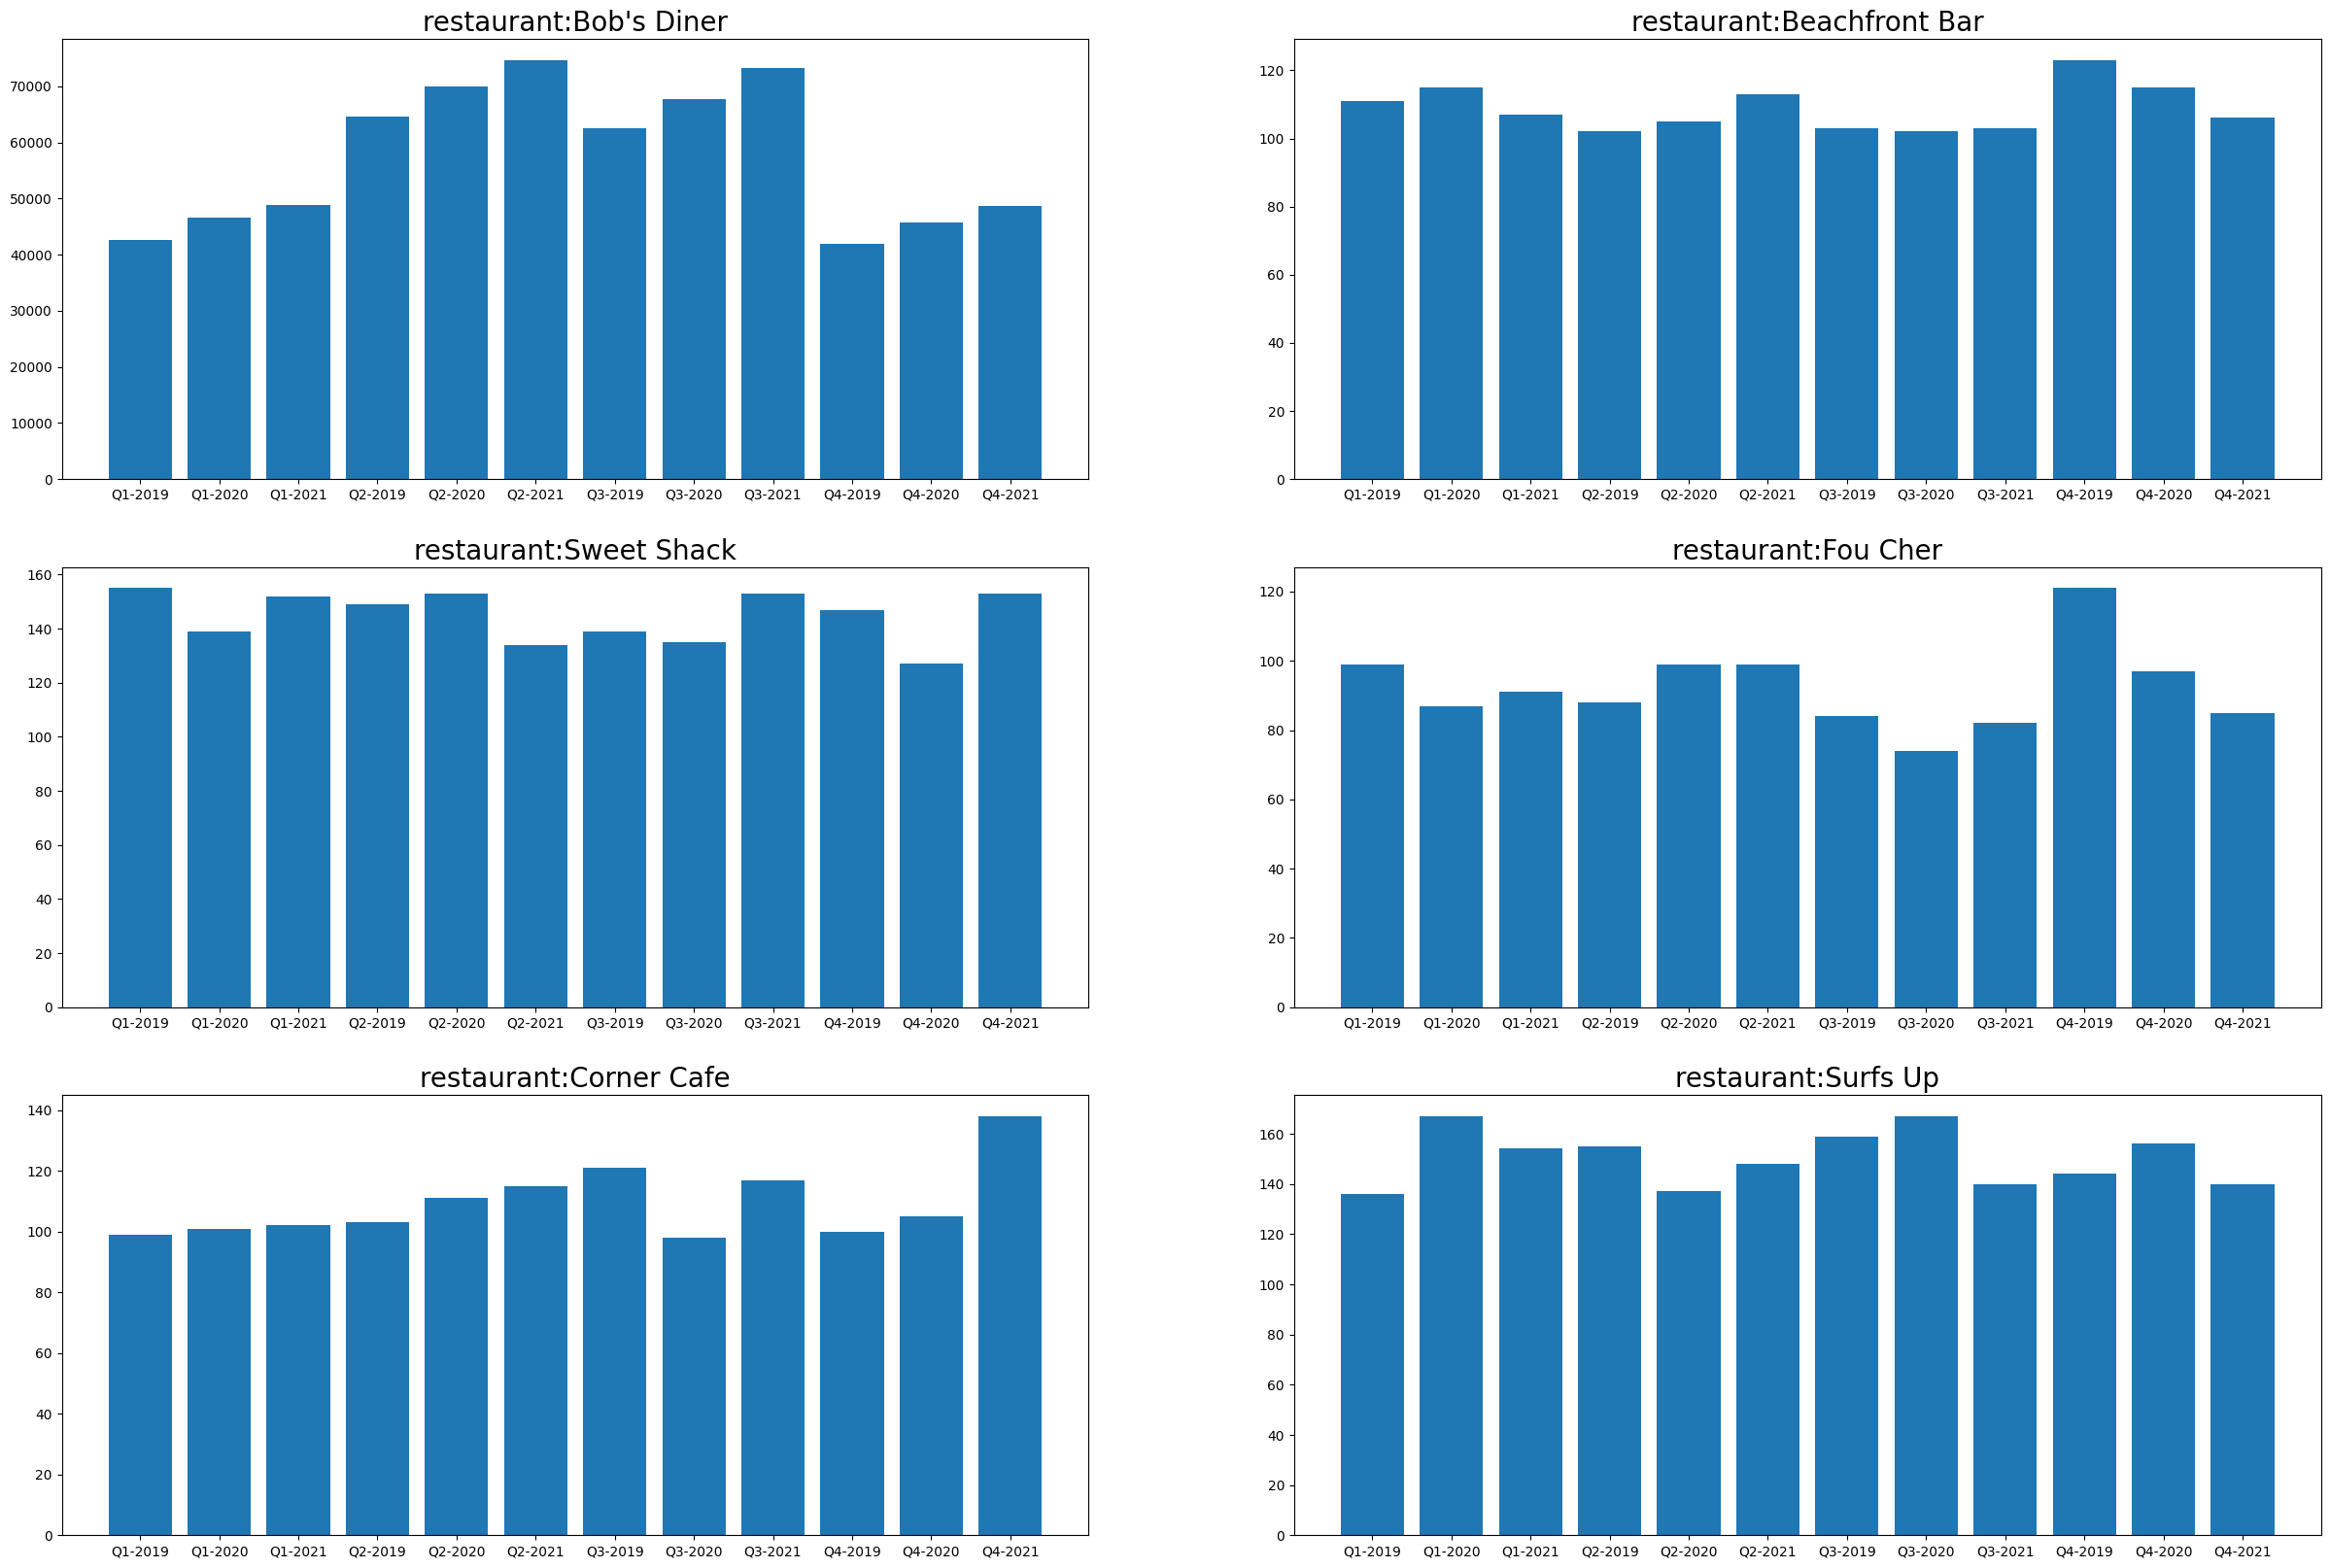

In [ ]:
fig,ax=plt.subplots(3,2,figsize=(30,20))
ax[0,0].set_title('top left')
r,c=0,0
for i in range(1,7):
    ax[r,c].bar(x=plot_data.index,height=plot_data.loc[:,i])
    ax[r,c].set_title('restaurant:{}'.format(resturants.loc[resturants.id==i,'name'].values[0]), size = 20)
    c+=1
    if c==2:
        c=0
        r+=1

<ipython-input-35-66e56337ce42>:3: FutureWarning: The provided callable <function sum at 0x7bd11a565a80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  plot_data=data.pivot_table(index='month_name',columns='store_id',values='item_count',aggfunc=np.sum)


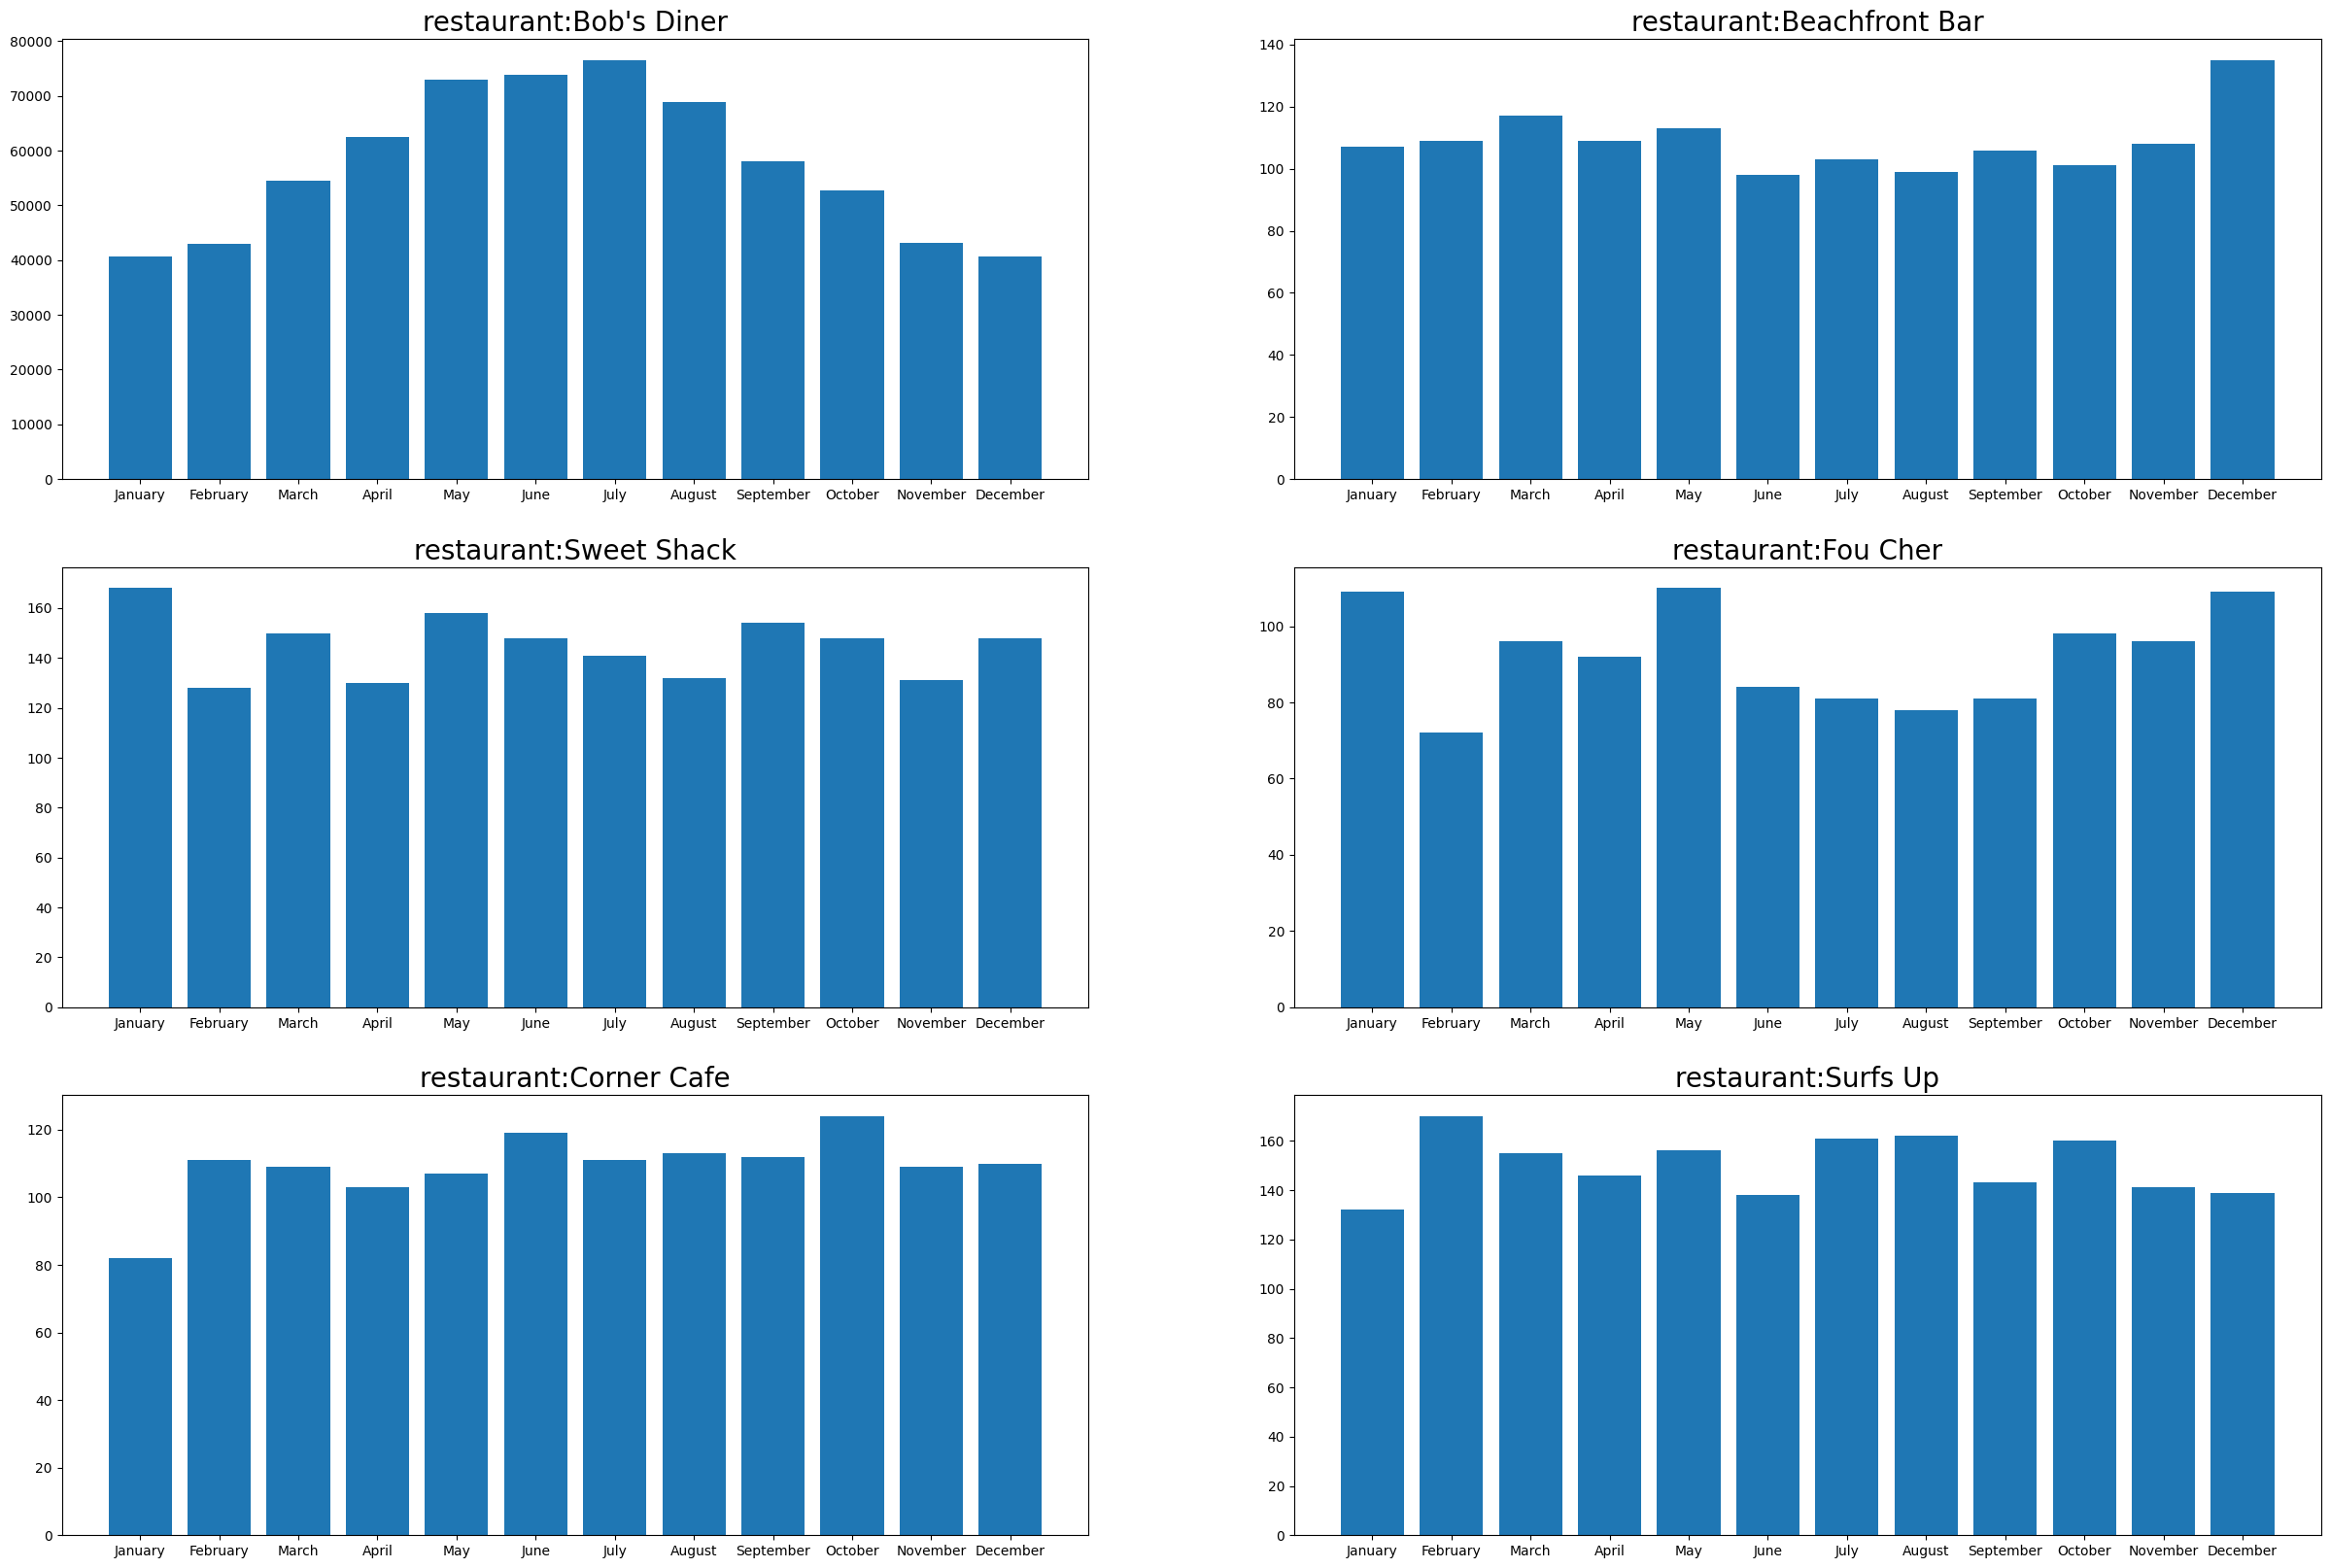

In [ ]:
# month_wise sales

plot_data=data.pivot_table(index='month_name',columns='store_id',values='item_count',aggfunc=np.sum)
plot_data=plot_data.loc[months]
fig,ax=plt.subplots(3,2,figsize=(30,20))
ax[0,0].set_title('top left')
r,c=0,0
for i in range(1,7):
    ax[r,c].bar(x=plot_data.index,height=plot_data.loc[:,i])
    ax[r,c].set_title('restaurant:{}'.format(resturants.loc[resturants.id==i,'name'].values[0]), size = 20)
    c+=1
    if c==2:
        c=0
        r+=1


In [ ]:
plot_data

store_id          1      2      3      4      5      6
month_name                                            
January     40672.0  107.0  168.0  109.0   82.0  132.0
February    43006.0  109.0  128.0   72.0  111.0  170.0
March       54510.0  117.0  150.0   96.0  109.0  155.0
April       62565.0  109.0  130.0   92.0  103.0  146.0
May         72988.0  113.0  158.0  110.0  107.0  156.0
June        73836.0   98.0  148.0   84.0  119.0  138.0
July        76528.0  103.0  141.0   81.0  111.0  161.0
August      68918.0   99.0  132.0   78.0  113.0  162.0
September   58064.0  106.0  154.0   81.0  112.0  143.0
October     52772.0  101.0  148.0   98.0  124.0  160.0
November    43085.0  108.0  131.0   96.0  109.0  141.0
December    40583.0  135.0  148.0  109.0  110.0  139.0

<ipython-input-37-6468fde00942>:3: FutureWarning: The provided callable <function sum at 0x7bd11a565a80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  plot_data=data.pivot_table(index='weekday',columns='store_id',values='item_count',aggfunc=np.sum)


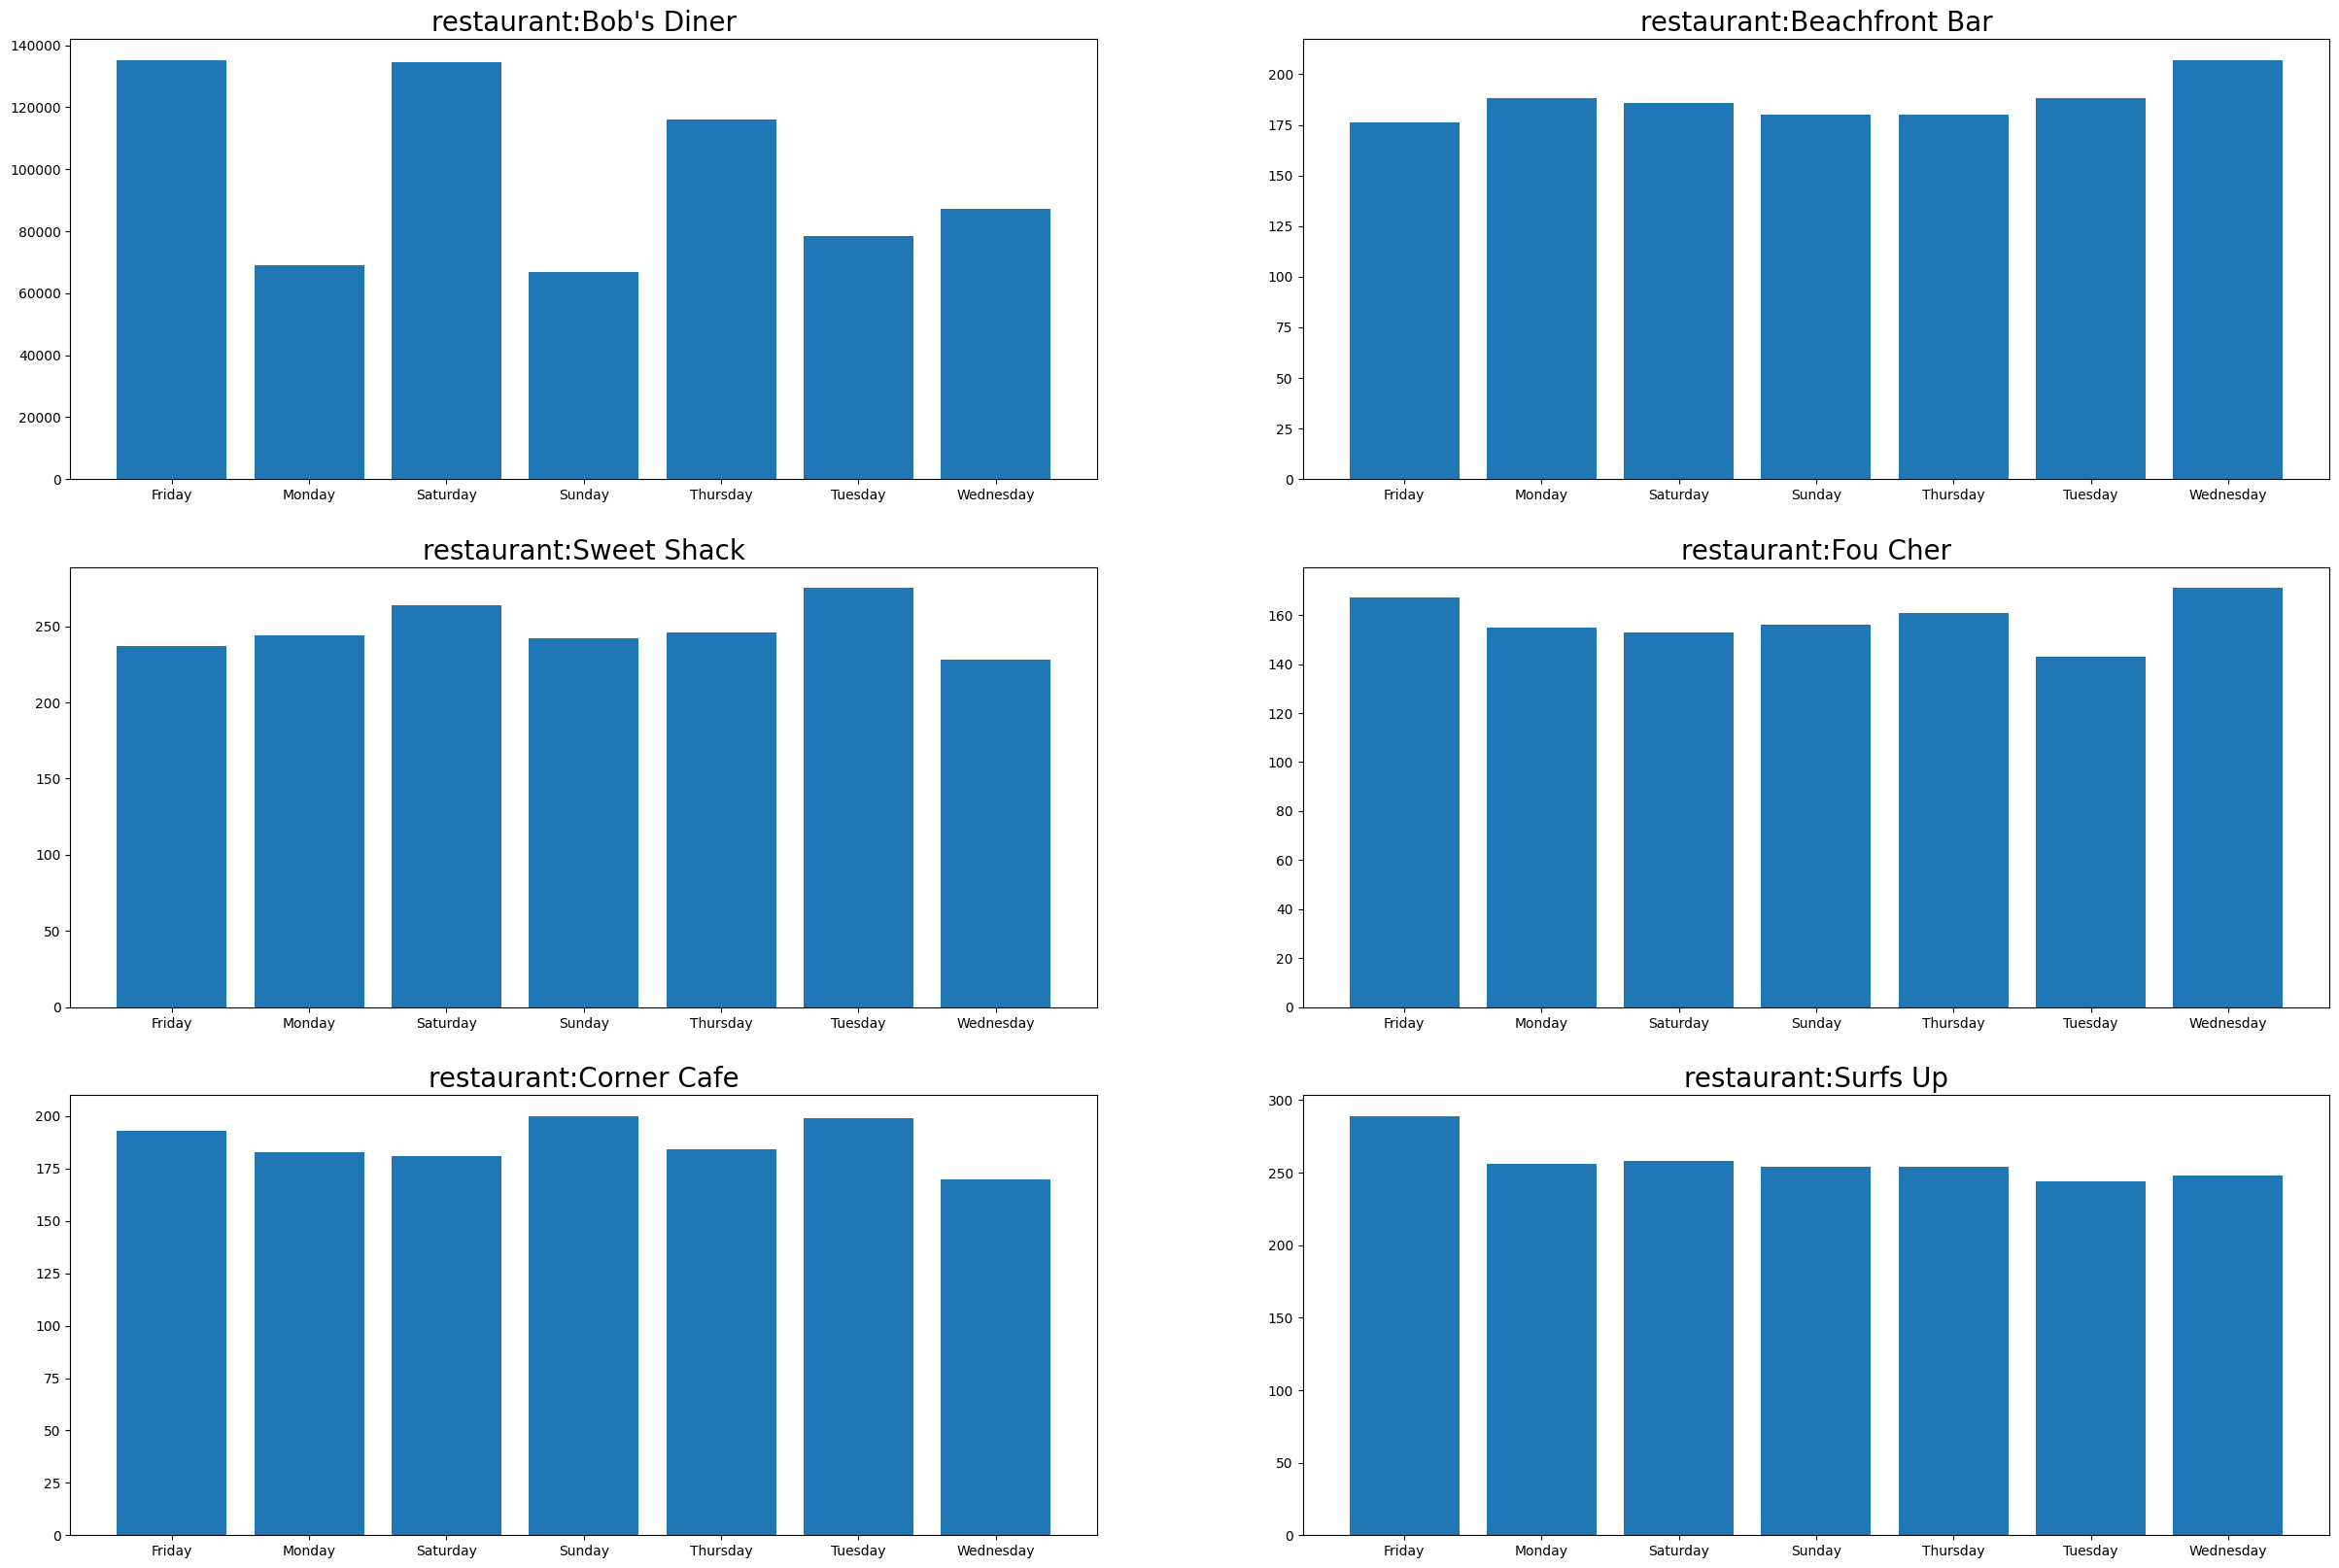

In [ ]:
# day_wise sales

plot_data=data.pivot_table(index='weekday',columns='store_id',values='item_count',aggfunc=np.sum)
# plot_data=plot_data.loc[months]
fig,ax=plt.subplots(3,2,figsize=(30,20))
ax[0,0].set_title('top left')
r,c=0,0
for i in range(1,7):
    ax[r,c].bar(x=plot_data.index,height=plot_data.loc[:,i])
    ax[r,c].set_title('restaurant:{}'.format(resturants.loc[resturants.id==i,'name'].values[0]), size = 20)
    c+=1
    if c==2:
        c=0
        r+=1


f):-

In [ ]:
plot_data=data.groupby('item_id')[['item_count']].sum().sort_values('item_count',ascending=False)

In [ ]:
plot_data[:5]

item_count
item_id            
19         236337.0
16         102990.0
76          61043.0
38          52772.0
9           43874.0

In [ ]:
final_plot_data=pd.merge(plot_data,items,left_on='item_id',right_on='id',how='left')

In [ ]:
final_plot_data

item_count  id  store_id                                        name  \
0     236337.0  19         1                          Strawberry Smoothy   
1     102990.0  16         1                        Frozen Milky Smoothy   
2      61043.0  76         1                          Amazing pork lunch   
3      52772.0  38         1                               Mutton Dinner   
4      43874.0   9         1                                Orange Juice   
..         ...  ..       ...                                         ...   
95         0.0  87         5                                  Milky Cake   
96         0.0  39         5  Awesome Fruity Lamb with Vegetables Dinner   
97         0.0  40         4     Fantastic Fruity Salmon with Bread meal   
98         0.0  77         3               Blue Ribbon Frozen Milky Cake   
99         0.0  98         2             Original Sweet Milky Soft Drink   

    kcal   cost  
0    145   2.89  
1    284   3.21  
2    679  17.93  
3    542  10.80  
4    135   3.91  
..   ...    ...  
95   627   7.22  
96   361  19.03  
97   815  22.67  
98   636   7.70  
99   579   5.00  

[100 rows x 6 columns]

In [ ]:
final_plot_data1=final_plot_data[:5]

In [ ]:
final_plot_data['id'].nunique()

100

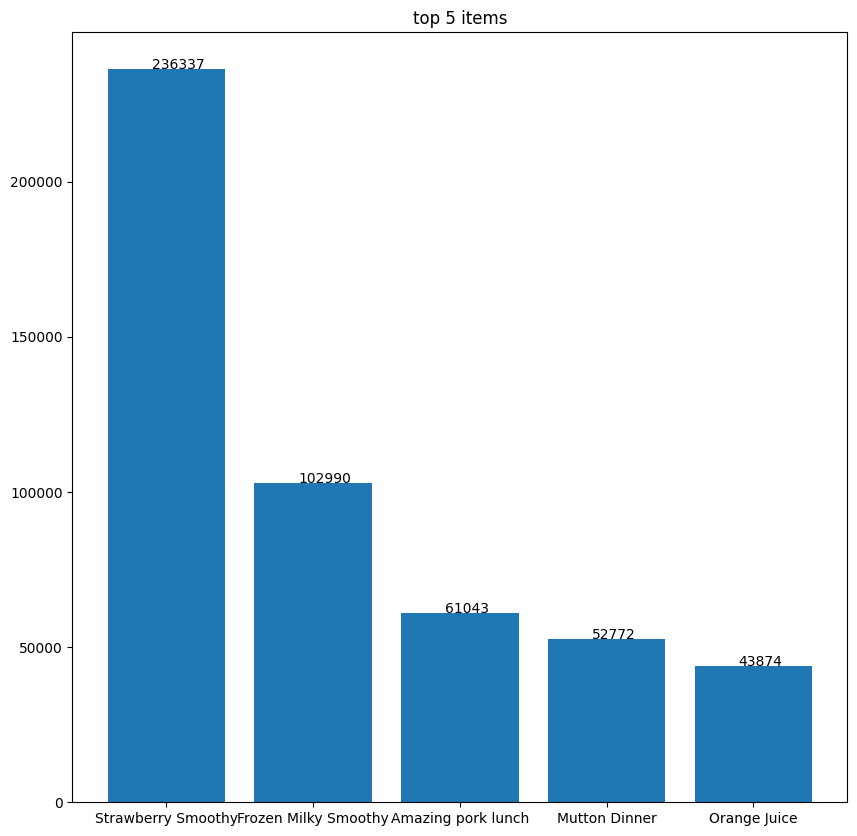

In [ ]:
plt.figure(figsize=(10,10))
plt.bar(final_plot_data1.name,height=final_plot_data1.item_count)
plt.title('top 5 items')
for i in range(5):
    val=final_plot_data1.loc[i,'item_count']
    plt.annotate('{:0.0f}'.format(val),xy=(i-0.1,val))

In [ ]:
# popular items by resturants
items.head(2)

id  store_id                               name  kcal   cost
0   1         4                     Chocolate Cake   554   6.71
1   2         4  Breaded Fish with Vegetables Meal   772  15.09

In [ ]:
# item_ids
count_data = data.pivot_table(index = 'item_id', columns = 'store_id',values = 'item_count', aggfunc = 'sum', fill_value = 0 )
item_ids = count_data.index[count_data.values.argmax(axis = 0)]


In [ ]:
count_data

store_id        1     2    3      4     5    6
item_id                                       
1             0.0   0.0  0.0    1.0   0.0  0.0
2             0.0   0.0  0.0    4.0   0.0  0.0
3          2946.0   0.0  0.0    0.0   0.0  0.0
4         34439.0   0.0  0.0    0.0   0.0  0.0
5             0.0   0.0  0.0    0.0  17.0  0.0
...           ...   ...  ...    ...   ...  ...
96            0.0   0.0  0.0    0.0  15.0  0.0
97            0.0   0.0  0.0  141.0   0.0  0.0
98            0.0   0.0  0.0    0.0   0.0  0.0
99            0.0   0.0  0.0   28.0   0.0  0.0
100           0.0  12.0  0.0    0.0   0.0  0.0

[100 rows x 6 columns]

In [ ]:
item_ids

Index([19, 42, 49, 80, 71, 89], dtype='int64', name='item_id')

In [ ]:
items.head(2)

id  store_id                               name  kcal   cost
0   1         4                     Chocolate Cake   554   6.71
1   2         4  Breaded Fish with Vegetables Meal   772  15.09

In [ ]:
pop_items=items.loc[items.id.isin(item_ids),['store_id','id','name','kcal','cost']]

In [ ]:
pop_items

store_id  id                           name  kcal   cost
18         1  19             Strawberry Smoothy   145   2.89
41         2  42        Fantastic Milky Smoothy   318   2.91
48         3  49                Awesome Smoothy    78   1.39
70         5  71           Frozen Milky Smoothy   211   3.98
79         4  80  Blue Ribbon Fruity Vegi Lunch   881  53.98
88         6  89             Awesome Soft Drink   248   3.06

In [ ]:
resturants

id            name
0   1     Bob's Diner
1   2  Beachfront Bar
2   3     Sweet Shack
3   4        Fou Cher
4   5     Corner Cafe
5   6        Surfs Up

In [ ]:
pop_data=pd.merge(pop_items,resturants,left_on='store_id',right_on='id',how='left')
pop_data.rename({'id_x':'id'},inplace=True,axis=1)

In [ ]:
pop_data

store_id  id                         name_x  kcal   cost  id_y  \
0         1  19             Strawberry Smoothy   145   2.89     1   
1         2  42        Fantastic Milky Smoothy   318   2.91     2   
2         3  49                Awesome Smoothy    78   1.39     3   
3         5  71           Frozen Milky Smoothy   211   3.98     5   
4         4  80  Blue Ribbon Fruity Vegi Lunch   881  53.98     4   
5         6  89             Awesome Soft Drink   248   3.06     6   

           name_y  
0     Bob's Diner  
1  Beachfront Bar  
2     Sweet Shack  
3     Corner Cafe  
4        Fou Cher  
5        Surfs Up

In [ ]:
count_data.loc[item_ids,].sum(axis=0).reset_index().iloc[:,1]

0    236337.0
1      1147.0
2      1692.0
3       298.0
4       273.0
5       997.0
Name: 0, dtype: float64

In [ ]:
pop_data['count']=count_data.loc[item_ids,].sum(axis=0).reset_index().iloc[:,1]

In [ ]:
pop_data


store_id  id                         name_x  kcal   cost  id_y  \
0         1  19             Strawberry Smoothy   145   2.89     1   
1         2  42        Fantastic Milky Smoothy   318   2.91     2   
2         3  49                Awesome Smoothy    78   1.39     3   
3         5  71           Frozen Milky Smoothy   211   3.98     5   
4         4  80  Blue Ribbon Fruity Vegi Lunch   881  53.98     4   
5         6  89             Awesome Soft Drink   248   3.06     6   

           name_y     count  
0     Bob's Diner  236337.0  
1  Beachfront Bar    1147.0  
2     Sweet Shack    1692.0  
3     Corner Cafe     298.0  
4        Fou Cher     273.0  
5        Surfs Up     997.0

g):-

In [ ]:
data.groupby('store_id')[['item_count']].sum().reset_index()

store_id  item_count
0         1    687527.0
1         2      1305.0
2         3      1736.0
3         4      1106.0
4         5      1310.0
5         6      1803.0

In [ ]:
data.head(2)

date  item_id  price  item_count  store_id  \
0 2019-01-01        3  29.22         2.0         1   
1 2019-01-01        4  26.42        22.0         1   

                         item_name  kcal   cost resturant_name  weekday  \
0                Sweet Fruity Cake   931  29.22    Bob's Diner  Tuesday   
1  Amazing Steak Dinner with Rolls   763  26.42    Bob's Diner  Tuesday   

  month_name  quarter quart-year  
0    January        1    Q1-2019  
1    January        1    Q1-2019

In [ ]:
data['amt_sales']=data['price']*data['item_count']
data['year']=data['date'].dt.year
data.head(2)

date  item_id  price  item_count  store_id  \
0 2019-01-01        3  29.22         2.0         1   
1 2019-01-01        4  26.42        22.0         1   

                         item_name  kcal   cost resturant_name  weekday  \
0                Sweet Fruity Cake   931  29.22    Bob's Diner  Tuesday   
1  Amazing Steak Dinner with Rolls   763  26.42    Bob's Diner  Tuesday   

  month_name  quarter quart-year  amt_sales  year  
0    January        1    Q1-2019      58.44  2019  
1    January        1    Q1-2019     581.24  2019

In [ ]:
# sales amt by store_id and year
data.pivot_table(index='store_id',columns='year',values='amt_sales',aggfunc=sum)


<ipython-input-51-bccc3b3ce72c>:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data.pivot_table(index='store_id',columns='year',values='amt_sales',aggfunc=sum)


year            2019        2020        2021
store_id                                    
1         1849483.49  2112331.91  2375460.29
2            1281.85     1267.21     1247.14
3             872.59      828.65      877.03
4            9698.80     8590.87     9595.70
5            5292.93     5347.71     5910.79
6            5132.65     5314.43     5204.41

In [ ]:
# restaurants by orders
rest_cnt=data.pivot_table(index='store_id',values='item_count',aggfunc=sum)

<ipython-input-52-3bb741b71f1d>:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  rest_cnt=data.pivot_table(index='store_id',values='item_count',aggfunc=sum)


In [ ]:
rest_cnt.sort_values(by='item_count',ascending=False,inplace=True)

In [ ]:
rest_cnt

item_count
store_id            
1           687527.0
6             1803.0
3             1736.0
5             1310.0
2             1305.0
4             1106.0

In [ ]:
rest_sales=data.pivot_table(index='store_id',values='amt_sales',aggfunc=sum)

<ipython-input-55-e845c13da539>:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  rest_sales=data.pivot_table(index='store_id',values='amt_sales',aggfunc=sum)


In [ ]:
rest_sales.sort_values(by='amt_sales',ascending=False,inplace=True)

In [ ]:
rest_sales

amt_sales
store_id            
1         6337275.69
4           27885.37
5           16551.43
6           15651.49
2            3796.20
3            2578.27

h):-

In [ ]:
items.head(2)

id  store_id                               name  kcal   cost
0   1         4                     Chocolate Cake   554   6.71
1   2         4  Breaded Fish with Vegetables Meal   772  15.09

In [ ]:
items.iloc[[items['cost'].argmax()]]

id  store_id                           name  kcal   cost
79  80         4  Blue Ribbon Fruity Vegi Lunch   881  53.98

In [ ]:
items.groupby('store_id')[['cost']].agg(['min','max','mean'])

cost                  
           min    max       mean
store_id                        
1         2.89  29.22  12.211667
2         2.43   5.70   3.585000
3         1.39   7.70   5.276250
4         3.23  53.98  12.819643
5         3.74  26.37  13.371667
6         3.06  26.21  13.970000

MACHINE LEARNING
a):-

In [ ]:
data['date'].describe()


count                 109600
mean     2020-07-01 12:00:00
min      2019-01-01 00:00:00
25%      2019-10-01 18:00:00
50%      2020-07-01 12:00:00
75%      2021-04-01 06:00:00
max      2021-12-31 00:00:00
Name: date, dtype: object

In [ ]:
ts=data.groupby('date')[['item_count']].sum().squeeze()

In [ ]:
# time_series

time_series=data.groupby(['date']).agg({'item_count':'sum','weekday':lambda x:x.unique()[0],
                            'quarter':lambda x:x.unique()[0],
                            'year':lambda x:x.unique()[0],
                            'month_name':lambda x:x.unique()[0],
                            'year':lambda x:x.unique()[0]})


In [ ]:
time_series

item_count    weekday  quarter  year month_name
date                                                       
2019-01-01       427.0    Tuesday        1  2019    January
2019-01-02       337.0  Wednesday        1  2019    January
2019-01-03       445.0   Thursday        1  2019    January
2019-01-04       564.0     Friday        1  2019    January
2019-01-05       552.0   Saturday        1  2019    January
...                ...        ...      ...   ...        ...
2021-12-27       192.0     Monday        4  2021   December
2021-12-28       344.0    Tuesday        4  2021   December
2021-12-29       371.0  Wednesday        4  2021   December
2021-12-30       527.0   Thursday        4  2021   December
2021-12-31       817.0     Friday        4  2021   December

[1096 rows x 5 columns]

In [ ]:
time_series['day_year']=time_series.index.day_of_year

In [ ]:
time_series['day_month']=time_series.index.day
time_series['week_num']=time_series.index.isocalendar().week.astype(int)

In [ ]:
time_series['week_num']

date
2019-01-01     1
2019-01-02     1
2019-01-03     1
2019-01-04     1
2019-01-05     1
              ..
2021-12-27    52
2021-12-28    52
2021-12-29    52
2021-12-30    52
2021-12-31    52
Name: week_num, Length: 1096, dtype: int64

In [ ]:
time_series

item_count    weekday  quarter  year month_name  day_year  \
date                                                                    
2019-01-01       427.0    Tuesday        1  2019    January         1   
2019-01-02       337.0  Wednesday        1  2019    January         2   
2019-01-03       445.0   Thursday        1  2019    January         3   
2019-01-04       564.0     Friday        1  2019    January         4   
2019-01-05       552.0   Saturday        1  2019    January         5   
...                ...        ...      ...   ...        ...       ...   
2021-12-27       192.0     Monday        4  2021   December       361   
2021-12-28       344.0    Tuesday        4  2021   December       362   
2021-12-29       371.0  Wednesday        4  2021   December       363   
2021-12-30       527.0   Thursday        4  2021   December       364   
2021-12-31       817.0     Friday        4  2021   December       365   

            day_month  week_num  
date                             
2019-01-01          1         1  
2019-01-02          2         1  
2019-01-03          3         1  
2019-01-04          4         1  
2019-01-05          5         1  
...               ...       ...  
2021-12-27         27        52  
2021-12-28         28        52  
2021-12-29         29        52  
2021-12-30         30        52  
2021-12-31         31        52  

[1096 rows x 8 columns]

In [ ]:
# convert the data from categorical to numeric
from sklearn.preprocessing import OrdinalEncoder
day_names=list(calendar.day_name)
day_names

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [ ]:
ord_enc=OrdinalEncoder(categories=[months,day_names])
ord_enc.fit(time_series[['month_name','weekday']])
time_series[['month_name','weekday']]=ord_enc.transform(time_series[['month_name','weekday']])
time_series

item_count  weekday  quarter  year  month_name  day_year  \
date                                                                   
2019-01-01       427.0      1.0        1  2019         0.0         1   
2019-01-02       337.0      2.0        1  2019         0.0         2   
2019-01-03       445.0      3.0        1  2019         0.0         3   
2019-01-04       564.0      4.0        1  2019         0.0         4   
2019-01-05       552.0      5.0        1  2019         0.0         5   
...                ...      ...      ...   ...         ...       ...   
2021-12-27       192.0      0.0        4  2021        11.0       361   
2021-12-28       344.0      1.0        4  2021        11.0       362   
2021-12-29       371.0      2.0        4  2021        11.0       363   
2021-12-30       527.0      3.0        4  2021        11.0       364   
2021-12-31       817.0      4.0        4  2021        11.0       365   

            day_month  week_num  
date                             
2019-01-01          1         1  
2019-01-02          2         1  
2019-01-03          3         1  
2019-01-04          4         1  
2019-01-05          5         1  
...               ...       ...  
2021-12-27         27        52  
2021-12-28         28        52  
2021-12-29         29        52  
2021-12-30         30        52  
2021-12-31         31        52  

[1096 rows x 8 columns]

In [ ]:
time_series.index.max()

Timestamp('2021-12-31 00:00:00')

In [ ]:
train = time_series[time_series.index < '2021-07-01']
test = time_series[time_series.index >= '2021-07-01']
y_var = 'item_count'
x_vars = time_series.drop(columns = 'item_count').columns
X_train = train[x_vars]
Y_train = train[y_var]
X_test = test[x_vars]
Y_test = test[y_var]

<ipython-input-69-eb14118ae160>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['lr_pred'] = lr.predict(X_test)


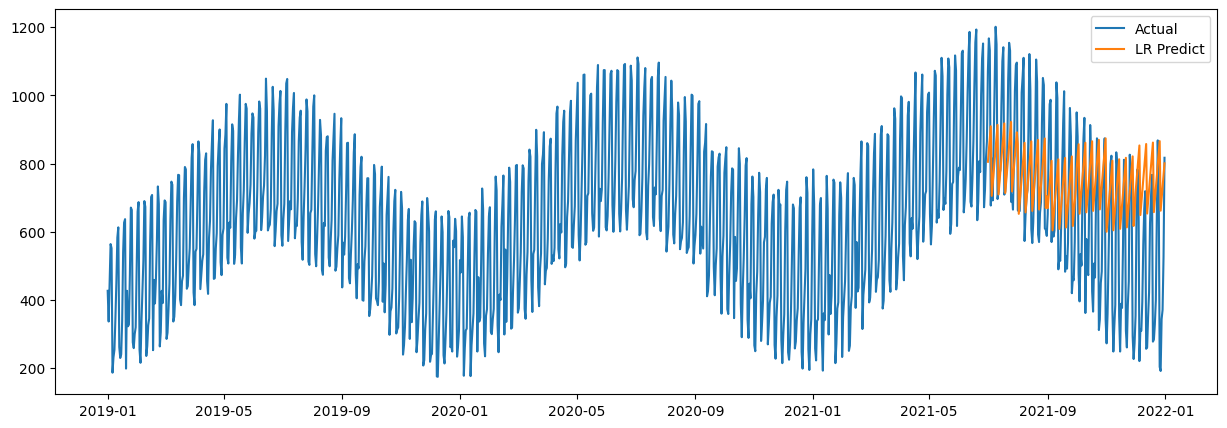

In [ ]:
#linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)
test['lr_pred'] = lr.predict(X_test)
plt.figure(figsize = (15,5))
plt.plot(time_series.item_count, label = "Actual")
plt.plot(test.lr_pred, label = "LR Predict")
plt.legend()
plt.show()

In [ ]:
import sklearn
print(sklearn.__version__)

1.6.1


In [ ]:
from sklearn.metrics import mean_squared_error , mean_absolute_error,r2_score
lr_rmse = np.sqrt(mean_squared_error(y_true=test.item_count, y_pred=test.lr_pred))
lr_mae = mean_absolute_error(y_true = test.item_count, y_pred = test.lr_pred)
lr_r2_score = r2_score(y_true = test.item_count, y_pred = test.lr_pred)
print("Linear Regression :\nRMSE : {:.2f}\nMAE : {:.2f}\nR2_Score : {:.2f}".format(lr_rmse,lr_mae,lr_r2_score*100))

Linear Regression :
RMSE : 244.21
MAE : 196.04
R2_Score : 7.65


In [ ]:
results = pd.DataFrame([lr_rmse, lr_mae,lr_r2_score*100], index = ['RMSE', 'MAE', 'R2_Score'], columns = ['Linear Regression']).round(2)
results

Linear Regression
RMSE                 244.21
MAE                  196.04
R2_Score               7.65

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping
# Evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# plt.style.use("fivethirtyeight")
pal = sns.color_palette()
pal_list = list(pal)

# for image study
import torch
import datetime as dt
import os
import tqdm


In [ ]:
import tensorflow as tf
print(tf.__version__)


2.18.0


<ipython-input-74-62192f9e7a9b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['rf_pred'] = rf.predict(X_test)


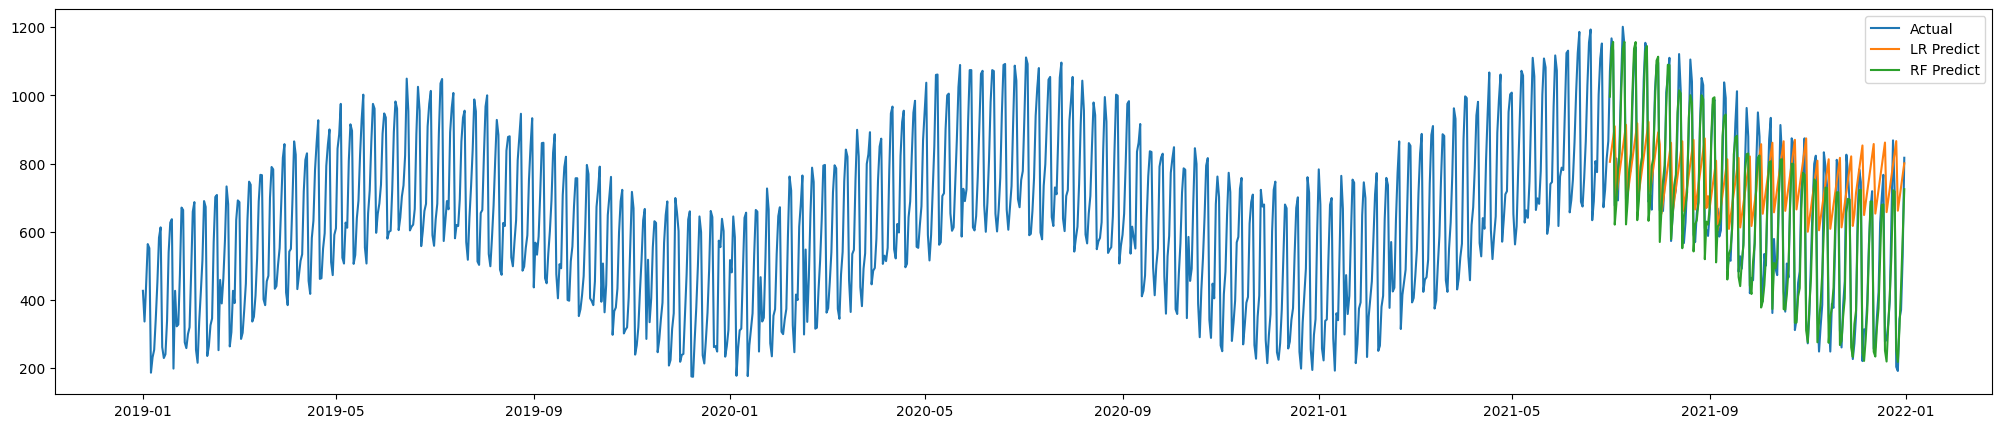

In [ ]:
#Random forest
rf = RandomForestRegressor(n_estimators=100, max_depth=20)
rf.fit(X_train, Y_train)
test['rf_pred'] = rf.predict(X_test)
plt.figure(figsize = (25,5))
plt.plot(time_series.item_count, label = "Actual")
plt.plot(test.lr_pred, label = "LR Predict")
plt.plot(test.rf_pred, label = "RF Predict")
plt.legend()
plt.show()

In [ ]:
rf_rmse = np.sqrt(mean_squared_error(y_true = test.item_count, y_pred = test.rf_pred))
rf_mae = mean_absolute_error(y_true = test.item_count, y_pred = test.rf_pred)
rf_r2_score = r2_score(y_true = test.item_count, y_pred = test.rf_pred)
print("Random Forest Regression :\nRMSE : {:.2f}\nMAE : {:.2f}\nR2_Score : {:.2f}".format(rf_rmse,rf_mae,rf_r2_score*100))

Random Forest Regression :
RMSE : 60.03
MAE : 47.46
R2_Score : 94.42


In [ ]:
results['Random Forest'] = [rf_rmse,rf_mae,rf_r2_score*100]
results.round(2)

Linear Regression  Random Forest
RMSE                 244.21          59.58
MAE                  196.04          47.07
R2_Score               7.65          94.50

[0]	validation_0-rmse:660.07829	validation_1-rmse:709.01212
[100]	validation_0-rmse:262.51190	validation_1-rmse:311.53220
[200]	validation_0-rmse:121.36888	validation_1-rmse:171.11193
[300]	validation_0-rmse:71.72975	validation_1-rmse:105.03640
[400]	validation_0-rmse:52.50055	validation_1-rmse:78.37923


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:53:28] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[500]	validation_0-rmse:44.19461	validation_1-rmse:71.59216
[590]	validation_0-rmse:40.38314	validation_1-rmse:71.95490


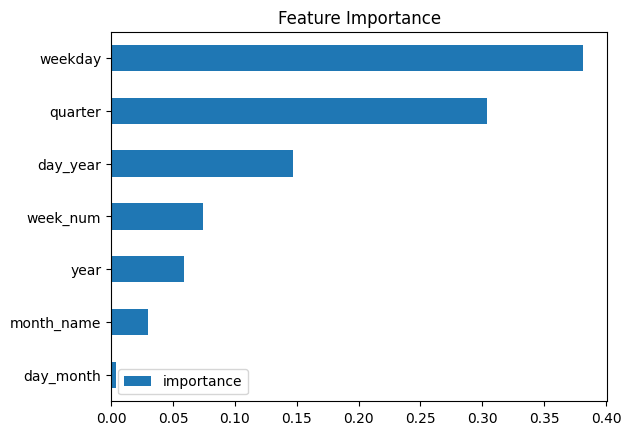

In [ ]:
#XGBoost
xgb = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
xgb.fit(X_train, Y_train,
        eval_set=[(X_train, Y_train), (X_test, Y_test)],
        verbose=100)
importance = pd.DataFrame(data=xgb.feature_importances_,
             index=xgb.get_booster().feature_names,
             columns=['importance'])
importance.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

<ipython-input-78-c7a7c9806271>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['xgb_pred'] = xgb.predict(X_test)


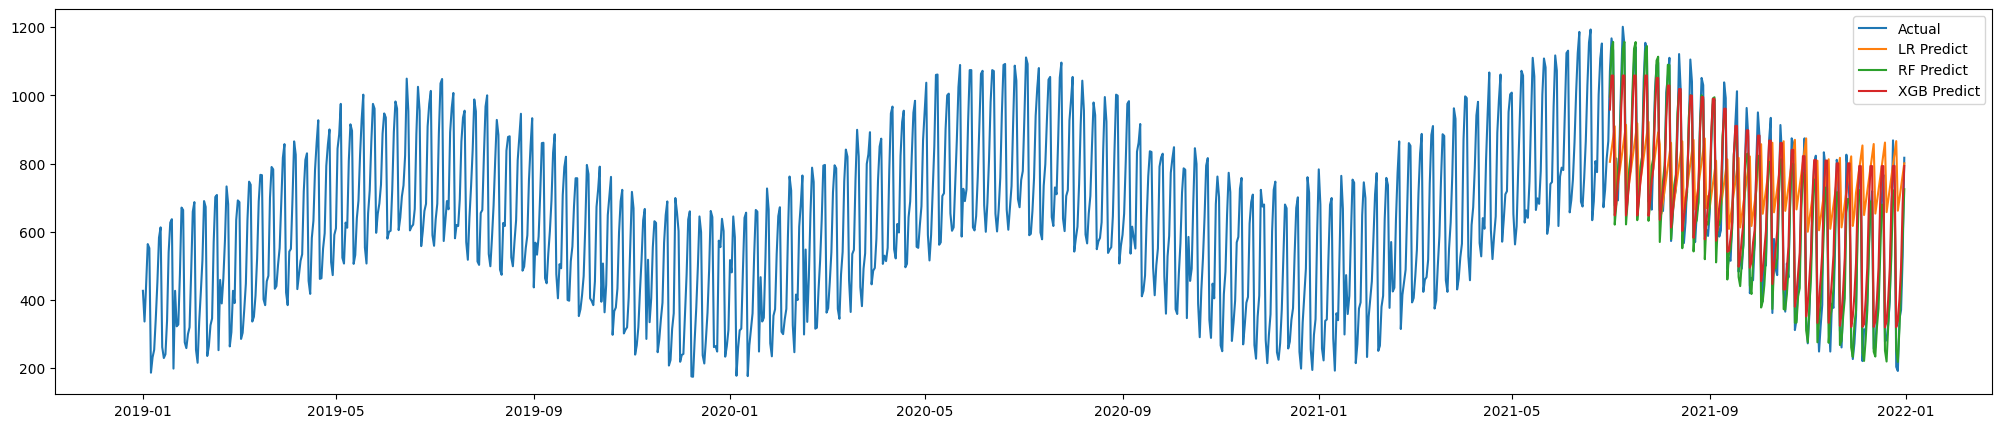

In [ ]:
test['xgb_pred'] = xgb.predict(X_test)
plt.figure(figsize = (25,5))
plt.plot(time_series.item_count, label = "Actual")
plt.plot(test.lr_pred, label = "LR Predict")
plt.plot(test.rf_pred, label = "RF Predict")
plt.plot(test.xgb_pred, label = "XGB Predict")
plt.legend()
plt.show()

In [ ]:
xgb_rmse = np.sqrt(mean_squared_error(y_true = test.item_count, y_pred = test.xgb_pred))
xgb_mae = mean_absolute_error(y_true = test.item_count, y_pred = test.xgb_pred)
xgb_r2_score = r2_score(y_true = test.item_count, y_pred = test.xgb_pred)
print("XGBoost :\nRMSE : {:.2f}\nMAE : {:.2f}\nR2_Score : {:.2f}".format(xgb_rmse,xgb_mae,xgb_r2_score*100))

XGBoost :
RMSE : 71.18
MAE : 58.45
R2_Score : 92.15


In [ ]:
results['XGBoost'] = [xgb_rmse,xgb_mae,xgb_r2_score*100]
results = results.round(2)

In [ ]:
results

Linear Regression  Random Forest  XGBoost
RMSE                 244.21          59.58    71.18
MAE                  196.04          47.07    58.45
R2_Score               7.65          94.50    92.15

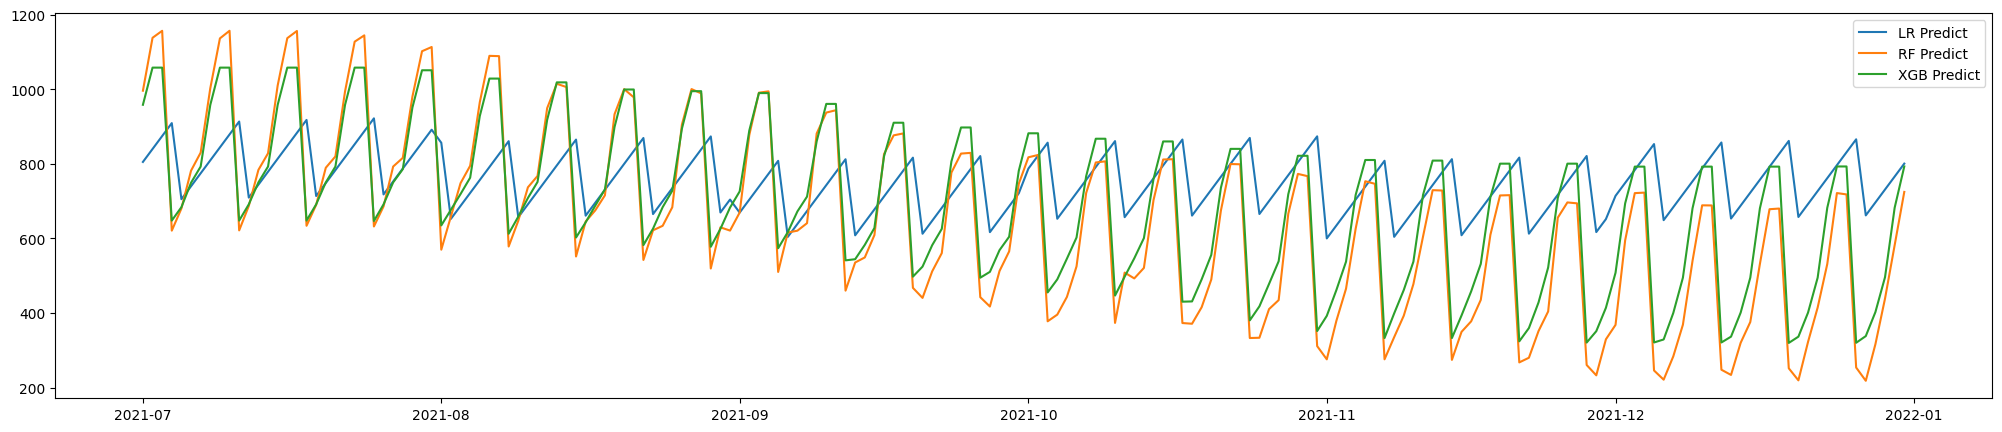

In [ ]:
plt.figure(figsize = (25,5))
plt.plot(test.lr_pred, label = "LR Predict")
plt.plot(test.rf_pred, label = "RF Predict")
plt.plot(test.xgb_pred, label = "XGB Predict")
plt.legend()
plt.show()

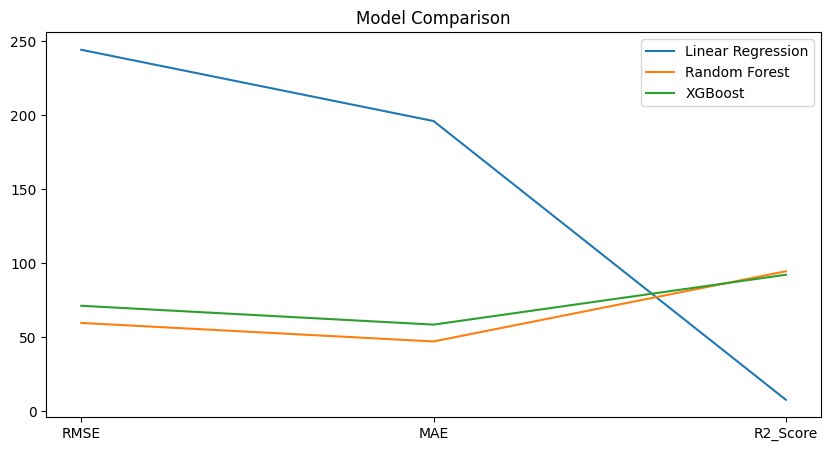

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(results['Linear Regression'], label = "Linear Regression")
plt.plot(results['Random Forest'], label = "Random Forest")
plt.plot(results['XGBoost'], label = "XGBoost")
plt.legend(loc = "upper right")
plt.title("Model Comparison")
plt.show()


In [ ]:
results

Linear Regression  Random Forest  XGBoost
RMSE                 244.21          59.58    71.18
MAE                  196.04          47.07    58.45
R2_Score               7.65          94.50    92.15

In [ ]:
time_series.index.max()

Timestamp('2021-12-31 00:00:00')

In [ ]:
future_predictors = pd.DataFrame(pd.date_range(start="2022-01-01", end="2022-12-31"), columns=['date'])
future_predictors.index = pd.to_datetime(future_predictors.date)


In [ ]:
X_train.columns

Index(['weekday', 'quarter', 'year', 'month_name', 'day_year', 'day_month',
       'week_num'],
      dtype='object')

In [ ]:
future_predictors.date.dt.isocalendar().week

date
2022-01-01    52
2022-01-02    52
2022-01-03     1
2022-01-04     1
2022-01-05     1
              ..
2022-12-27    52
2022-12-28    52
2022-12-29    52
2022-12-30    52
2022-12-31    52
Name: week, Length: 365, dtype: UInt32

In [ ]:
future_predictors['weekday'] = future_predictors.date.dt.day_name()
future_predictors['quarter'] = future_predictors.date.dt.quarter
future_predictors['year'] = future_predictors.date.dt.year
future_predictors['month_name'] = future_predictors.date.dt.month_name()
future_predictors['day_year'] = future_predictors.date.dt.day_of_year
future_predictors['day_month'] = future_predictors.date.dt.day
future_predictors['week_num'] = future_predictors.date.dt.isocalendar().week


In [ ]:
future_predictors.head(2)

date   weekday  quarter  year month_name  day_year  \
date                                                                  
2022-01-01 2022-01-01  Saturday        1  2022    January         1   
2022-01-02 2022-01-02    Sunday        1  2022    January         2   

            day_month  week_num  
date                             
2022-01-01          1        52  
2022-01-02          2        52

In [ ]:
future_predictors[['month_name', 'weekday']] = ord_enc.transform(future_predictors[['month_name', 'weekday']])
future_predictors['predictions'] = rf.predict(future_predictors[X_train.columns])

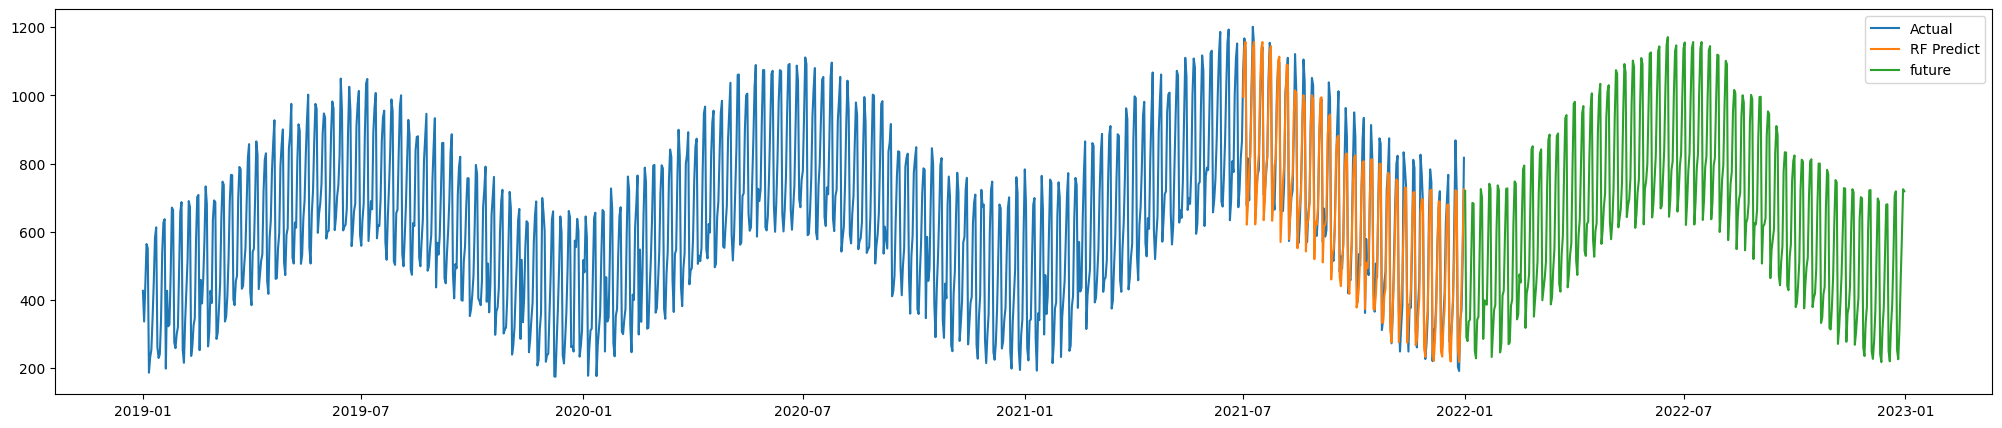

In [ ]:
plt.figure(figsize = (25,5))
plt.plot(time_series.item_count, label = "Actual")
plt.plot(test.rf_pred, label = "RF Predict")
plt.plot(future_predictors.predictions, label = "future")
plt.legend()
plt.show()

DEEP LEARNING
a):-

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109600 entries, 0 to 109599
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            109600 non-null  datetime64[ns]
 1   item_id         109600 non-null  int64         
 2   price           109600 non-null  float64       
 3   item_count      109600 non-null  float64       
 4   store_id        109600 non-null  int64         
 5   item_name       109600 non-null  object        
 6   kcal            109600 non-null  int64         
 7   cost            109600 non-null  float64       
 8   resturant_name  109600 non-null  object        
 9   weekday         109600 non-null  object        
 10  month_name      109600 non-null  object        
 11  quarter         109600 non-null  int32         
 12  quart-year      109600 non-null  object        
 13  amt_sales       109600 non-null  float64       
 14  year            109600 non-null  int

In [ ]:
time_ser = data.groupby('date').agg({'amt_sales': 'sum'})
time_ser

amt_sales
date                 
2019-01-01    4023.00
2019-01-02    3074.69
2019-01-03    4062.71
2019-01-04    5006.81
2019-01-05    4927.53
...               ...
2021-12-27    1867.71
2021-12-28    3426.50
2021-12-29    3715.39
2021-12-30    5266.27
2021-12-31    8287.81

[1096 rows x 1 columns]

In [ ]:
train = time_ser[time_ser.index < '2021-07-01']
test = time_ser[time_ser.index >= '2021-07-01']

In [ ]:
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
# We're only using one feature here
n_features = 1
length = 12

b):-

In [ ]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=1)
model.fit(generator,epochs=20,validation_data=validation_generator,callbacks=[early_stop])

Epoch 1/20
886/900 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0035

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0035 - val_loss: 0.0060
Epoch 2/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0034 - val_loss: 0.0052
Epoch 3/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0030 - val_loss: 0.0050
Epoch 4/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0036 - val_loss: 0.0058
Epoch 5/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0030 - val_loss: 0.0052


<Axes: >

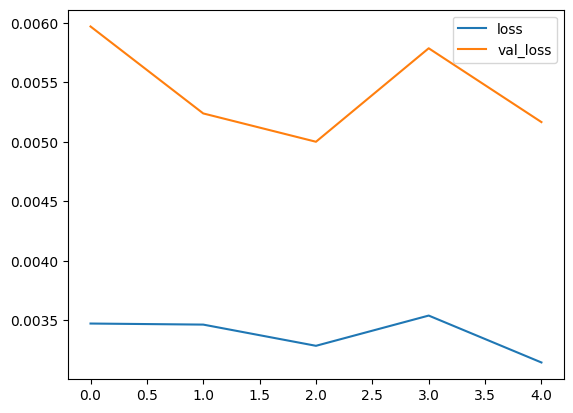

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))
for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    # store prediction
    test_predictions.append(current_pred)
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions

<ipython-input-102-df68ac2ffec1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [ ]:
test

amt_sales   Predictions
date                               
2021-07-01   10290.33   9842.857073
2021-07-02   11028.59  11075.683709
2021-07-03   10793.51  10732.368183
2021-07-04    6524.13   7542.616271
2021-07-05    7983.57   7473.636587
...               ...           ...
2021-12-27    1867.71   9508.569996
2021-12-28    3426.50   9473.541018
2021-12-29    3715.39   9983.578175
2021-12-30    5266.27  11663.193433
2021-12-31    8287.81  12958.187952

[184 rows x 2 columns]

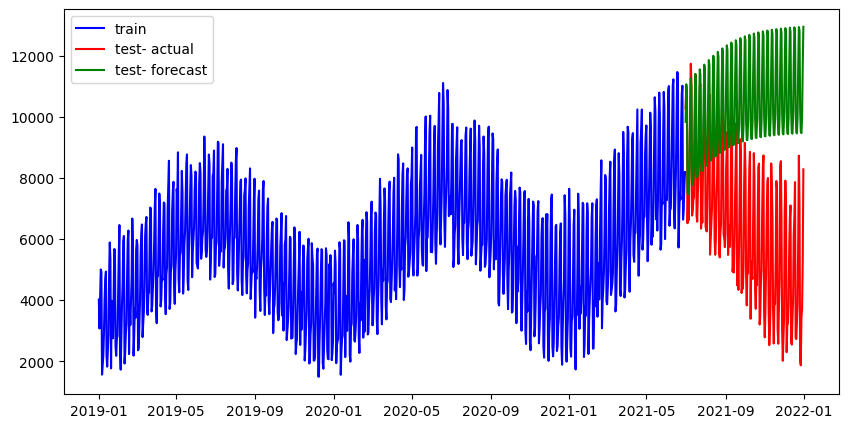

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(train, color = 'blue', label = 'train')
plt.plot(test.amt_sales, color = 'red', label = 'test- actual')
plt.plot(test.index, test.Predictions,color = 'green', label = 'test- forecast')
plt.legend()
plt.show()

<Axes: xlabel='date'>

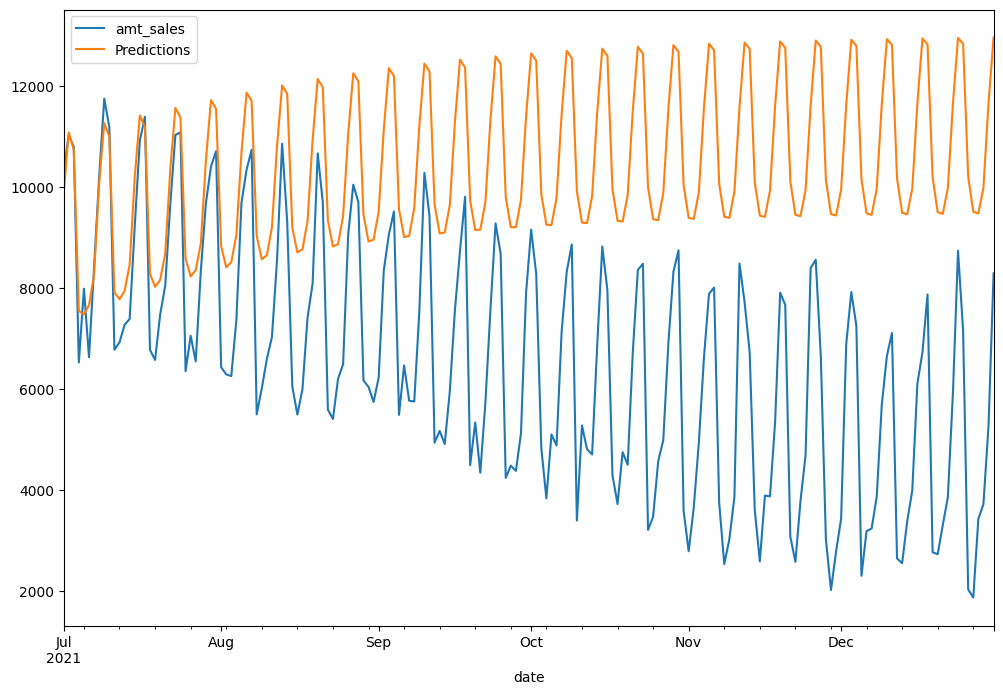

In [ ]:
test.plot(figsize=(12,8))

c):-

In [ ]:
mape_dl = mean_absolute_percentage_error(y_true = test.amt_sales, y_pred = test.Predictions)
print("MAPE for LSTM : ", mape_dl)

MAPE for LSTM :  0.8594887685661837


In [ ]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(time_ser)
length = 3*30 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(generator,epochs=8)

Epoch 1/8


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1006/1006 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0473
Epoch 2/8
1006/1006 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0249
Epoch 3/8
1006/1006 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0107
Epoch 4/8
1006/1006 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0101
Epoch 5/8
1006/1006 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0075
Epoch 6/8
1006/1006 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0048
Epoch 7/8
1006/1006 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0038
Epoch 8/8
1006/1006 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0041


In [ ]:
forecast = []
periods = 3*30

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):

    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]

    # store prediction
    forecast.append(current_pred)

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━

In [ ]:
forecast = scaler.inverse_transform(forecast)
forecast_dates = pd.date_range(start='2022-01-01 ',periods=3*30, freq = "D")
forecast_data = pd.DataFrame(data=forecast,index=forecast_dates,columns=['Forecast']).squeeze()
forecast_data

2022-01-01    7041.357037
2022-01-02    2367.741991
2022-01-03    2557.758355
2022-01-04    3078.009347
2022-01-05    3869.161270
                 ...     
2022-03-27    3243.091998
2022-03-28    2949.412264
2022-03-29    3533.572768
2022-03-30    4239.779047
2022-03-31    5535.567393
Freq: D, Name: Forecast, Length: 90, dtype: float64

In [ ]:
time_ser

amt_sales
date                 
2019-01-01    4023.00
2019-01-02    3074.69
2019-01-03    4062.71
2019-01-04    5006.81
2019-01-05    4927.53
...               ...
2021-12-27    1867.71
2021-12-28    3426.50
2021-12-29    3715.39
2021-12-30    5266.27
2021-12-31    8287.81

[1096 rows x 1 columns]

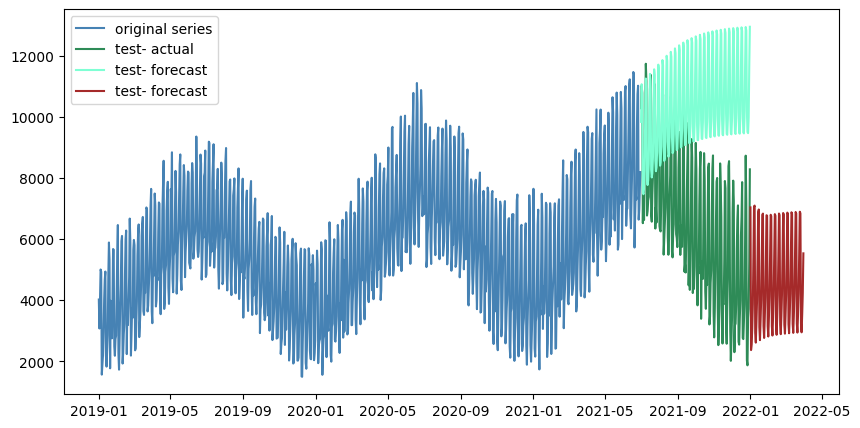

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(train.index, train.amt_sales, color = 'steelblue', label = 'original series')
plt.plot(test.index, test.amt_sales,color = 'seagreen', label = 'test- actual')
plt.plot(test.index, test.Predictions,color = 'aquamarine', label = 'test- forecast')
plt.plot(forecast_data.index, forecast_data.values, color = 'brown', label = 'test- forecast')
plt.legend()
plt.show()

In [ ]:

mape_dl

0.8594887685661837

In [ ]:

pd.DataFrame([mape_dl ], index = ['LSTM'])

0
LSTM  0.859489